# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Evlin
- Email: evelinsitanggang@gmail.com
- Id Dicoding:evlinzxxx

## Persiapan

### Menyiapkan library yang dibutuhkan

In [2]:
import os
import joblib
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from scipy.stats import chi2_contingency
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

### Menyiapkan data yang akan digunakan

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/employee_data.csv')
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


## Data Understanding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [ ]:
df.shape

(1470, 35)

Untuk memahami data dilakukan beberapa pengecekan seperti pengecekan ukuran data dengan menggunakan shape() dan dapat dilihat dataset yang akan digunakan memiliki ukuran 1470 baris dengan 35 kolom. Serta terdapat missing value pada kolom Attrition.

Dengan deskripsi kolom dalam employee dataset sebagai berikut:

- `EmployeeId`: Identifikasi unik untuk setiap karyawan.
- `Age`: Usia karyawan.
- `Attrition`: Menunjukkan apakah karyawan tersebut mengundurkan diri ('Yes'), tidak ('No'), atau statusnya tidak diketahui ('Unknown').
- `BusinessTravel`: Frekuensi perjalanan bisnis karyawan ('Travel_Frequently', 'Travel_Rarely', 'Non-Travel').
- `DailyRate`: Tarif harian karyawan.
- `Department`: Departemen di mana karyawan bekerja ('Sales', 'Research & - - Development', 'Human Resources').
- `DistanceFromHome`: Jarak dari rumah karyawan ke tempat kerja (dalam mil).
- `Education`: Tingkat pendidikan karyawan (1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor').
- `EducationField`: Bidang pendidikan karyawan ('Life Sciences', 'Medical', 'Marketing', dll.).
- `EmployeeCount`: Jumlah karyawan (konstan, selalu bernilai 1).
- `EnvironmentSatisfaction`: Tingkat kepuasan karyawan terhadap lingkungan kerja (1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High').
- `Gender`: Jenis kelamin karyawan ('Male' atau 'Female').
- `HourlyRate`: Tarif per jam karyawan.
- `JobInvolvement`: Tingkat keterlibatan karyawan dalam pekerjaan (1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High').
- `JobLevel`: Tingkat pekerjaan karyawan dalam perusahaan (1, 2, 3, dll.).
- `JobRole`: Peran atau jabatan karyawan dalam perusahaan ('Sales Executive', 'Research Scientist', dll.).
- `JobSatisfaction`: Tingkat kepuasan karyawan terhadap pekerjaan mereka (1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High').
- `MaritalStatus`: Status perkawinan karyawan ('Single', 'Married', 'Divorced').
- `MonthlyIncome`: Pendapatan bulanan karyawan.
- `MonthlyRate`: Tarif bulanan karyawan.
- `NumCompaniesWorked`: Jumlah perusahaan tempat karyawan telah bekerja sebelumnya.
- `Over18`: Menunjukkan apakah karyawan tersebut berusia di atas 18 tahun (selalu bernilai 'Y').
- `OverTime`: Menunjukkan apakah karyawan tersebut bekerja lembur atau tidak ('Yes' atau 'No').
- `PercentSalaryHike`: Persentase kenaikan gaji terakhir karyawan.
- `PerformanceRating`: Rating kinerja karyawan (1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding').
- `RelationshipSatisfaction`: Tingkat kepuasan karyawan terhadap hubungan mereka di tempat kerja (1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High').
- `StandardHours`: Jam kerja standar (konstan, selalu bernilai 80).
- `StockOptionLevel`: Tingkat opsi saham yang dimiliki karyawan.
- `TotalWorkingYears`: Total tahun bekerja karyawan.
- `TrainingTimesLastYear`: Jumlah pelatihan yang diikuti karyawan tahun lalu.
- `WorkLifeBalance`: Tingkat keseimbangan antara kehidupan kerja dan kehidupan pribadi karyawan (1: 'Bad', 2: 'Good', 3: 'Better', 4: 'Best').
- `YearsAtCompany`: Jumlah tahun karyawan telah bekerja di perusahaan saat ini.
- `YearsInCurrentRole`: Jumlah tahun karyawan telah bekerja dalam peran saat ini.
- `YearsSinceLastPromotion`: Jumlah tahun sejak promosi terakhir karyawan.
- `YearsWithCurrManager`: Jumlah tahun dengan manajer saat ini.

In [ ]:
# Cek data unik tiap variabel

for fitur in df:
  if df[fitur].dtype == "object":
    print(f"Fitur {fitur}")
    print(df[fitur].unique(),"\n")

Fitur BusinessTravel
['Travel_Frequently' 'Travel_Rarely' 'Non-Travel'] 

Fitur Department
['Human Resources' 'Research & Development' 'Sales'] 

Fitur EducationField
['Other' 'Medical' 'Life Sciences' 'Marketing' 'Technical Degree'
 'Human Resources'] 

Fitur Gender
['Male' 'Female'] 

Fitur JobRole
['Human Resources' 'Healthcare Representative' 'Research Scientist'
 'Sales Executive' 'Manager' 'Laboratory Technician' 'Research Director'
 'Manufacturing Director' 'Sales Representative'] 

Fitur MaritalStatus
['Married' 'Single' 'Divorced'] 

Fitur Over18
['Y'] 

Fitur OverTime
['Yes' 'No'] 



## **Data Visualization**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/clean.csv')

Berikutnya membuat **Correlation Heatmap**, yaitu representasi visual matriks korelasi antar kolom numerik dalam dataset. Fungsi **`df.corr(numeric_only=True)`** menghitung nilai korelasi antar kolom numerik, menghasilkan matriks korelasi. Heatmap ini kemudian divisualisasikan menggunakan `seaborn.heatmap`, di mana warna menunjukkan kekuatan dan arah hubungan (positif atau negatif) antar variabel.

Masking digunakan dengan `np.triu` untuk menampilkan hanya setengah bagian matriks (segitiga atas), sehingga menghindari duplikasi informasi. Heatmap ini membantu menganalisis hubungan antar variabel dalam dataset, seperti menentukan variabel yang memiliki korelasi tinggi atau rendah, yang bermanfaat dalam feature selection atau interpretasi data.

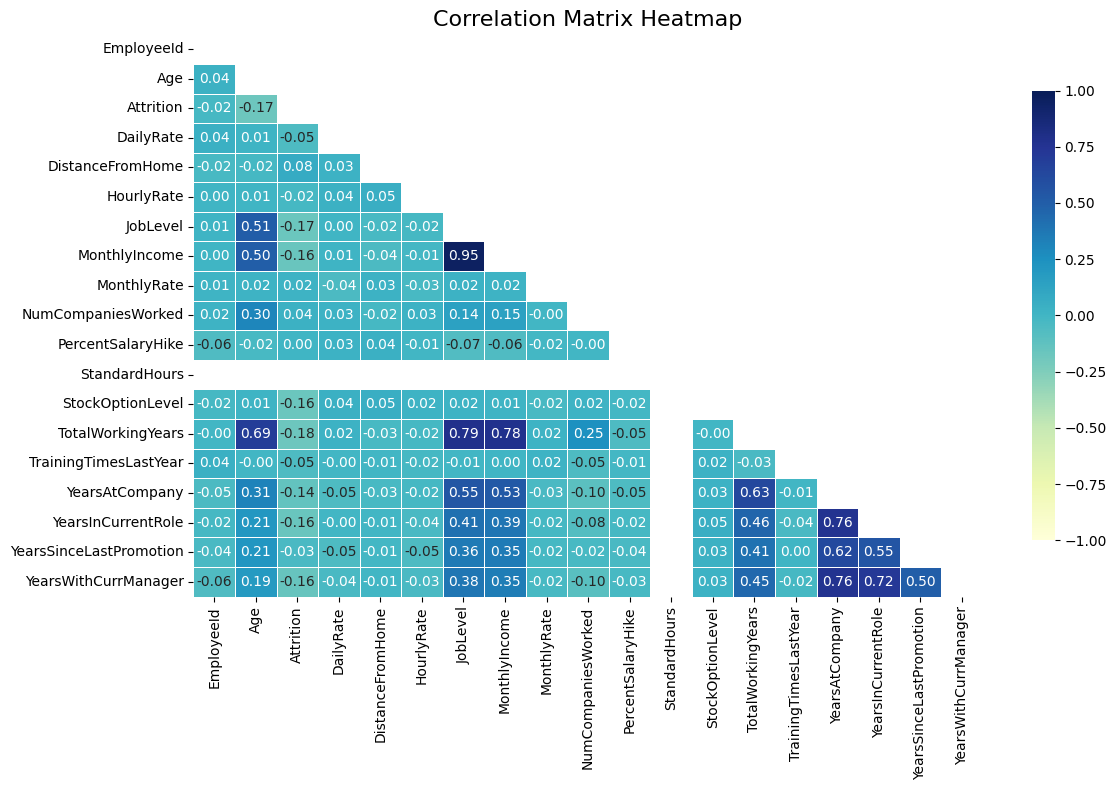

In [ ]:
# Menghitung dan memvisualisasikan matriks korelasi
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr(numeric_only=True)

# Menggunakan mask untuk menampilkan segitiga bawah
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Membuat heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,
    mask=mask,
    cmap="YlGnBu",
    vmin=-1, vmax=1,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.tight_layout()
plt.show()

Beberapa temuan menarik dari heatmap di atas:  

1. Korelasi fitur terhadap dirinya sendiri bernilai sempurna (1), yang menunjukkan hubungan maksimal.  
2. **Age** memiliki korelasi tinggi dengan **TotalWorkingYears**, karena semakin bertambah usia seseorang, biasanya jumlah total tahun pengalaman kerja juga meningkat.  
3. **Age** juga berkorelasi kuat dengan **JobLevel**, mencerminkan bahwa karyawan yang lebih tua sering kali menduduki posisi yang lebih senior di perusahaan.  
4. Penghasilan bulanan (**MonthlyIncome**) memiliki hubungan positif dengan **Age**, karena karyawan yang lebih tua cenderung mendapatkan gaji lebih besar akibat pengalaman kerja yang panjang.  
5. **JobLevel** berkorelasi sangat kuat dengan **MonthlyIncome**, karena jabatan yang lebih tinggi biasanya disertai penghasilan yang lebih besar.  
6. **JobLevel** juga menunjukkan hubungan positif dengan **TotalWorkingYears**, karena karyawan yang berada di tingkat jabatan tinggi umumnya memiliki pengalaman kerja lebih banyak.  
7. **MonthlyIncome** memiliki korelasi yang signifikan dengan **TotalWorkingYears**, menunjukkan bahwa pengalaman kerja jangka panjang memengaruhi besarnya penghasilan.  
8. **YearsWithCurrManager** menunjukkan hubungan erat dengan **YearsAtCompany**, menandakan bahwa lama bekerja di perusahaan cenderung paralel dengan waktu bersama manajer saat ini.  
9. **YearsAtCompany** berkorelasi positif dengan **YearsInCurrentRole**, karena semakin lama bekerja di perusahaan, kemungkinan besar masa jabatan pada peran saat ini juga bertambah.

Berikutnya memvisualisasikan distribusi data dari fitur numerik dalam dataset menggunakan histogram. Histogram membantu memahami pola distribusi, seperti normalitas, skewness, atau adanya outlier pada masing-masing fitur numerik.

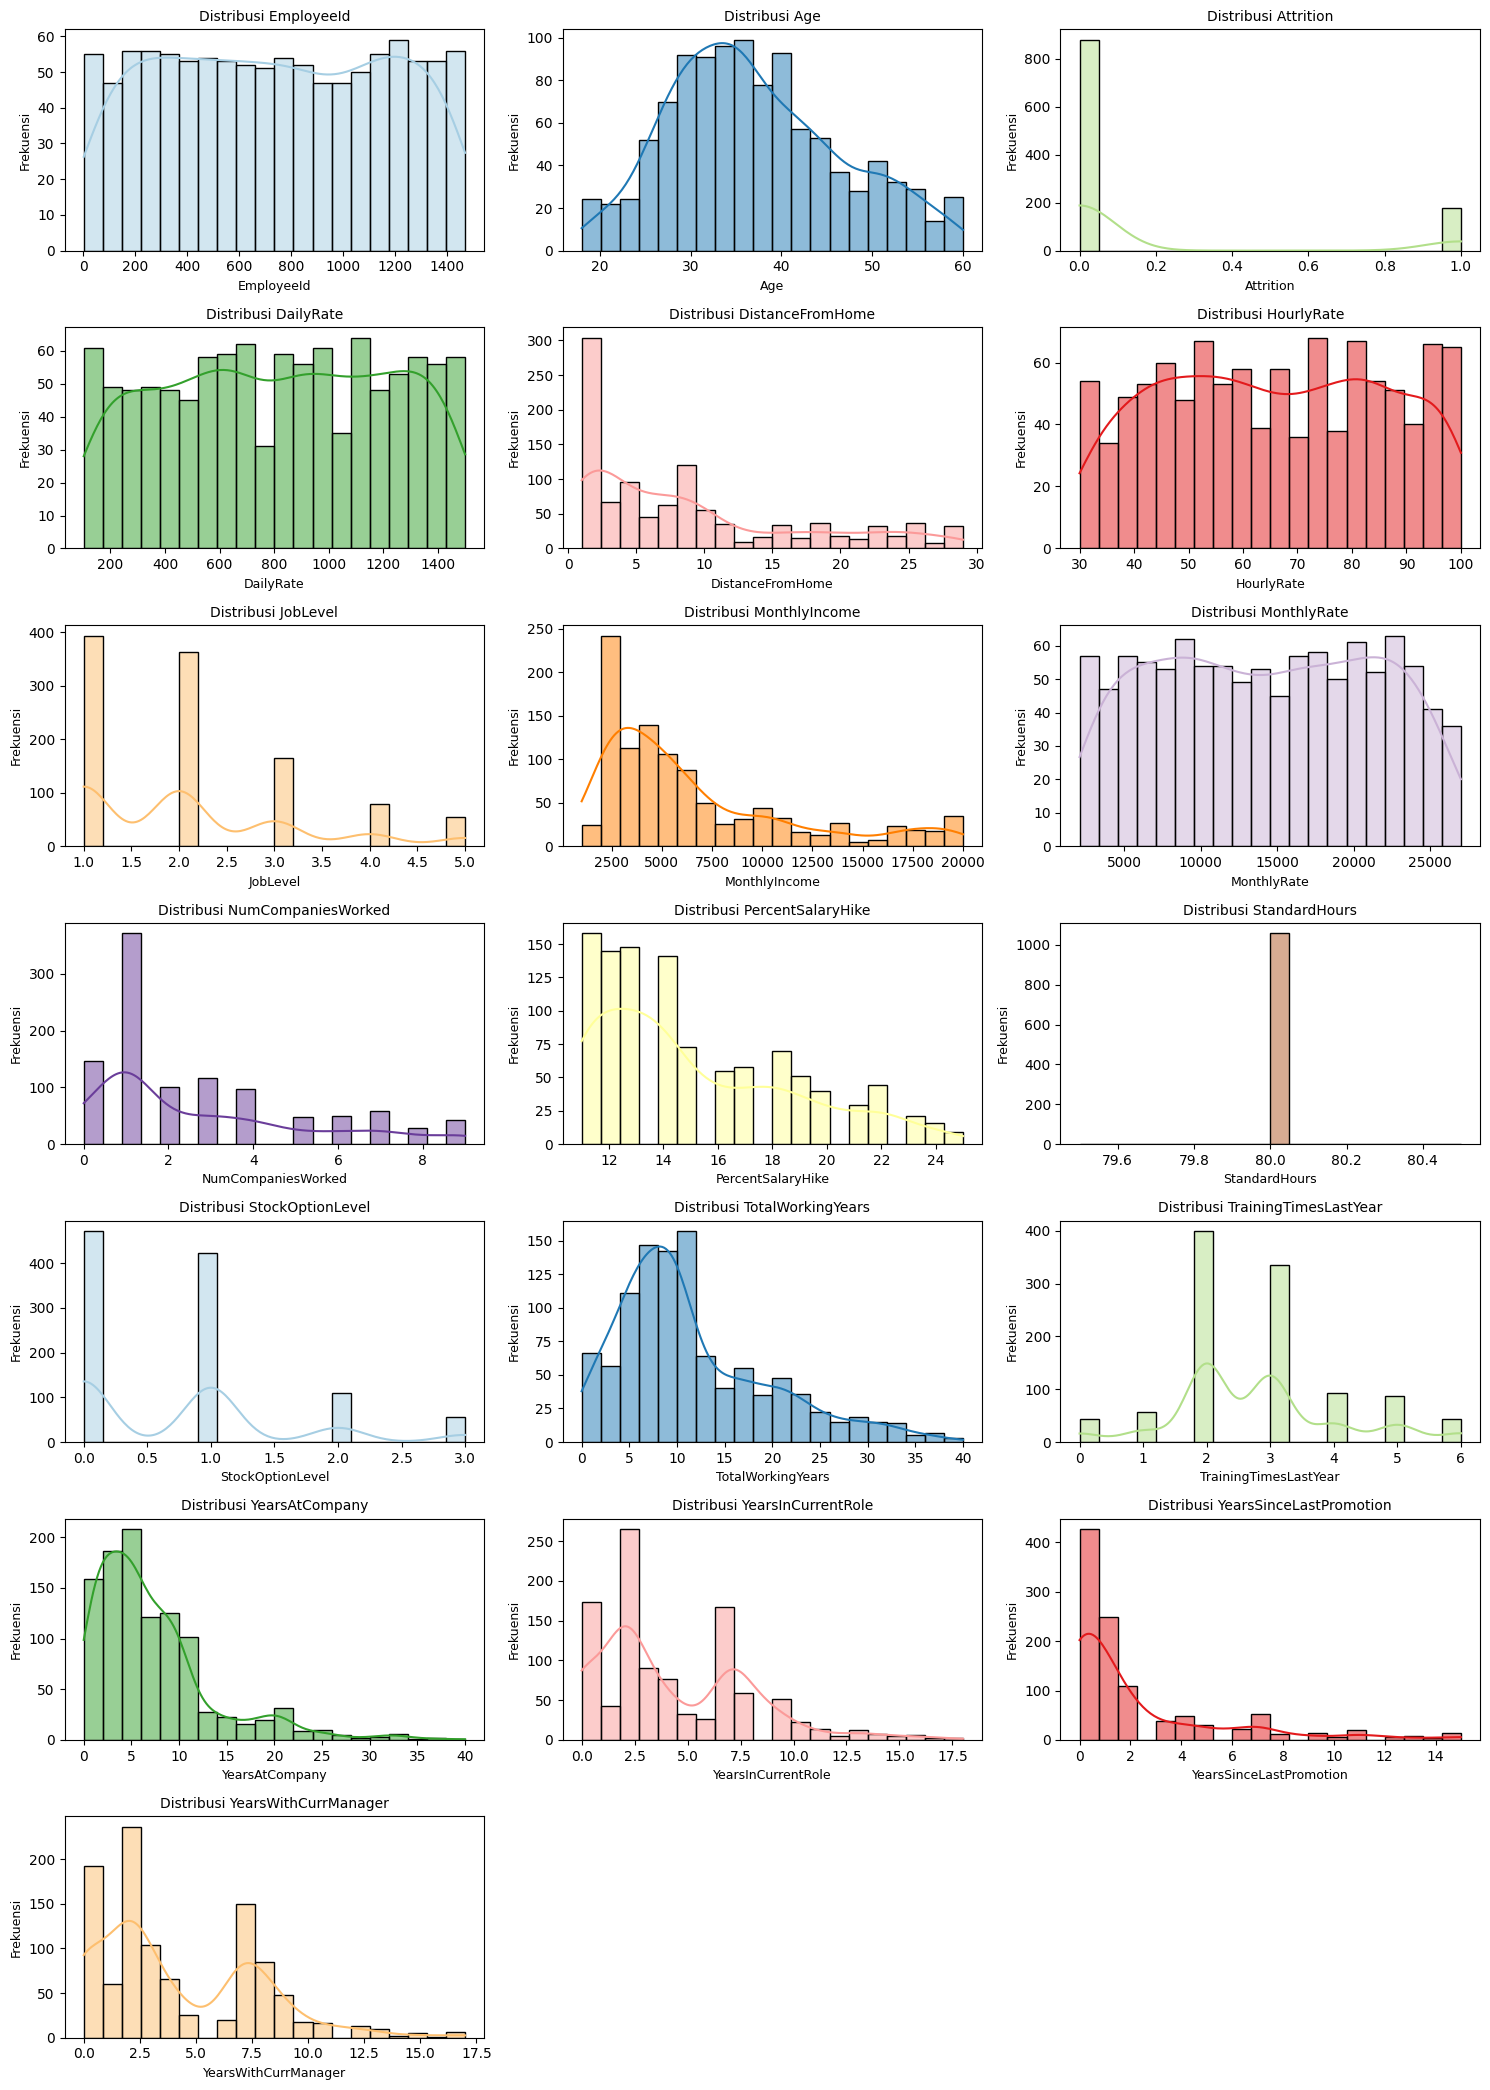

In [ ]:
# Mengidentifikasi fitur numerik
numerik_fitur = df.select_dtypes(include=['int64', 'float64']).columns

# Menentukan jumlah subplot (grid dinamis)
num_histograms = len(numerik_fitur)
num_cols = 3
num_rows = (num_histograms + num_cols - 1) // num_cols  # Membuat grid otomatis

# Membuat figure & subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))
axes_flat = axes.flatten()

# Membuat histogram dengan warna otomatis
for i, column in enumerate(numerik_fitur):
    sns.histplot(data=df, x=column, ax=axes_flat[i], bins=20, kde=True, color=plt.cm.Paired.colors[i % 12])
    axes_flat[i].set_title(f'Distribusi {column}', fontsize=10)
    axes_flat[i].set_xlabel(column, fontsize=9)
    axes_flat[i].set_ylabel('Frekuensi', fontsize=9)

# Menyembunyikan sisa grid jika tidak terpakai
for j in range(len(numerik_fitur), len(axes_flat)):
    axes_flat[j].axis('off')

# Menampilkan grafik histogram
plt.tight_layout()
plt.show()


Berdasarkan histogram di atas, terlihat bahwa beberapa fitur numerik menunjukkan distribusi miring ke kanan (right-skewed distribution), seperti **DistanceFromHome**, **MonthlyIncome**, **NumCompaniesWorked**, **PercentageSalaryHike**, **TotalWorkingYears**, **YearsAtCompany**, **YearsInCurrentRole**, **YearsSinceLastPromotion**, dan **YearsWithCurrManager**. Distribusi ini menunjukkan bahwa sebagian besar nilai berada di rentang rendah, dengan sedikit nilai yang jauh lebih tinggi.

Sebaliknya, fitur seperti **Age** dan **TrainingTimesLastYear** menunjukkan pola yang mendekati normal distribution, di mana nilai-nilai tersebar lebih merata dengan puncak di sekitar rata-rata. Hal ini menunjukkan bahwa data pada fitur-fitur ini cenderung simetris dan tidak condong ke salah satu sisi.

Berikutnya membuat visualisasi distribusi data numerik menggunakan boxplot. Boxplot berguna untuk menganalisis penyebaran data, mendeteksi outlier, dan memahami hubungan antara fitur numerik dengan fitur segmentasi tertentu. Proses ini akan diurutkan muali dari 2 fitur yakni :

1. Education
2. Job Role

In [ ]:
def plot_numerical_box(features, df, segment_by=None, hide_outliers=False):
    segment_feature = len(features)
    fig, axes = plt.subplots(segment_feature, 1, figsize=(14, segment_feature * 4))

    if segment_feature == 1:
        axes = [axes]

    for idx, feature in enumerate(features):
        if segment_by:
            sns.boxplot(data=df, x=feature, y=segment_by, ax=axes[idx], showfliers=not hide_outliers, hue=segment_by, palette="Set3", legend=False)
            axes[idx].set_title(f"Boxplot {feature} berdasarkan {segment_by}", fontsize=12)
            axes[idx].set_xlabel(feature, fontsize=10)
            axes[idx].set_ylabel(segment_by, fontsize=10)
        else:
            sns.boxplot(data=df, x=feature, ax=axes[idx], showfliers=not hide_outliers, color="skyblue")
            axes[idx].set_title(f"Boxplot {feature}", fontsize=12)
            axes[idx].set_xlabel(feature, fontsize=10)

    plt.tight_layout()
    plt.show()


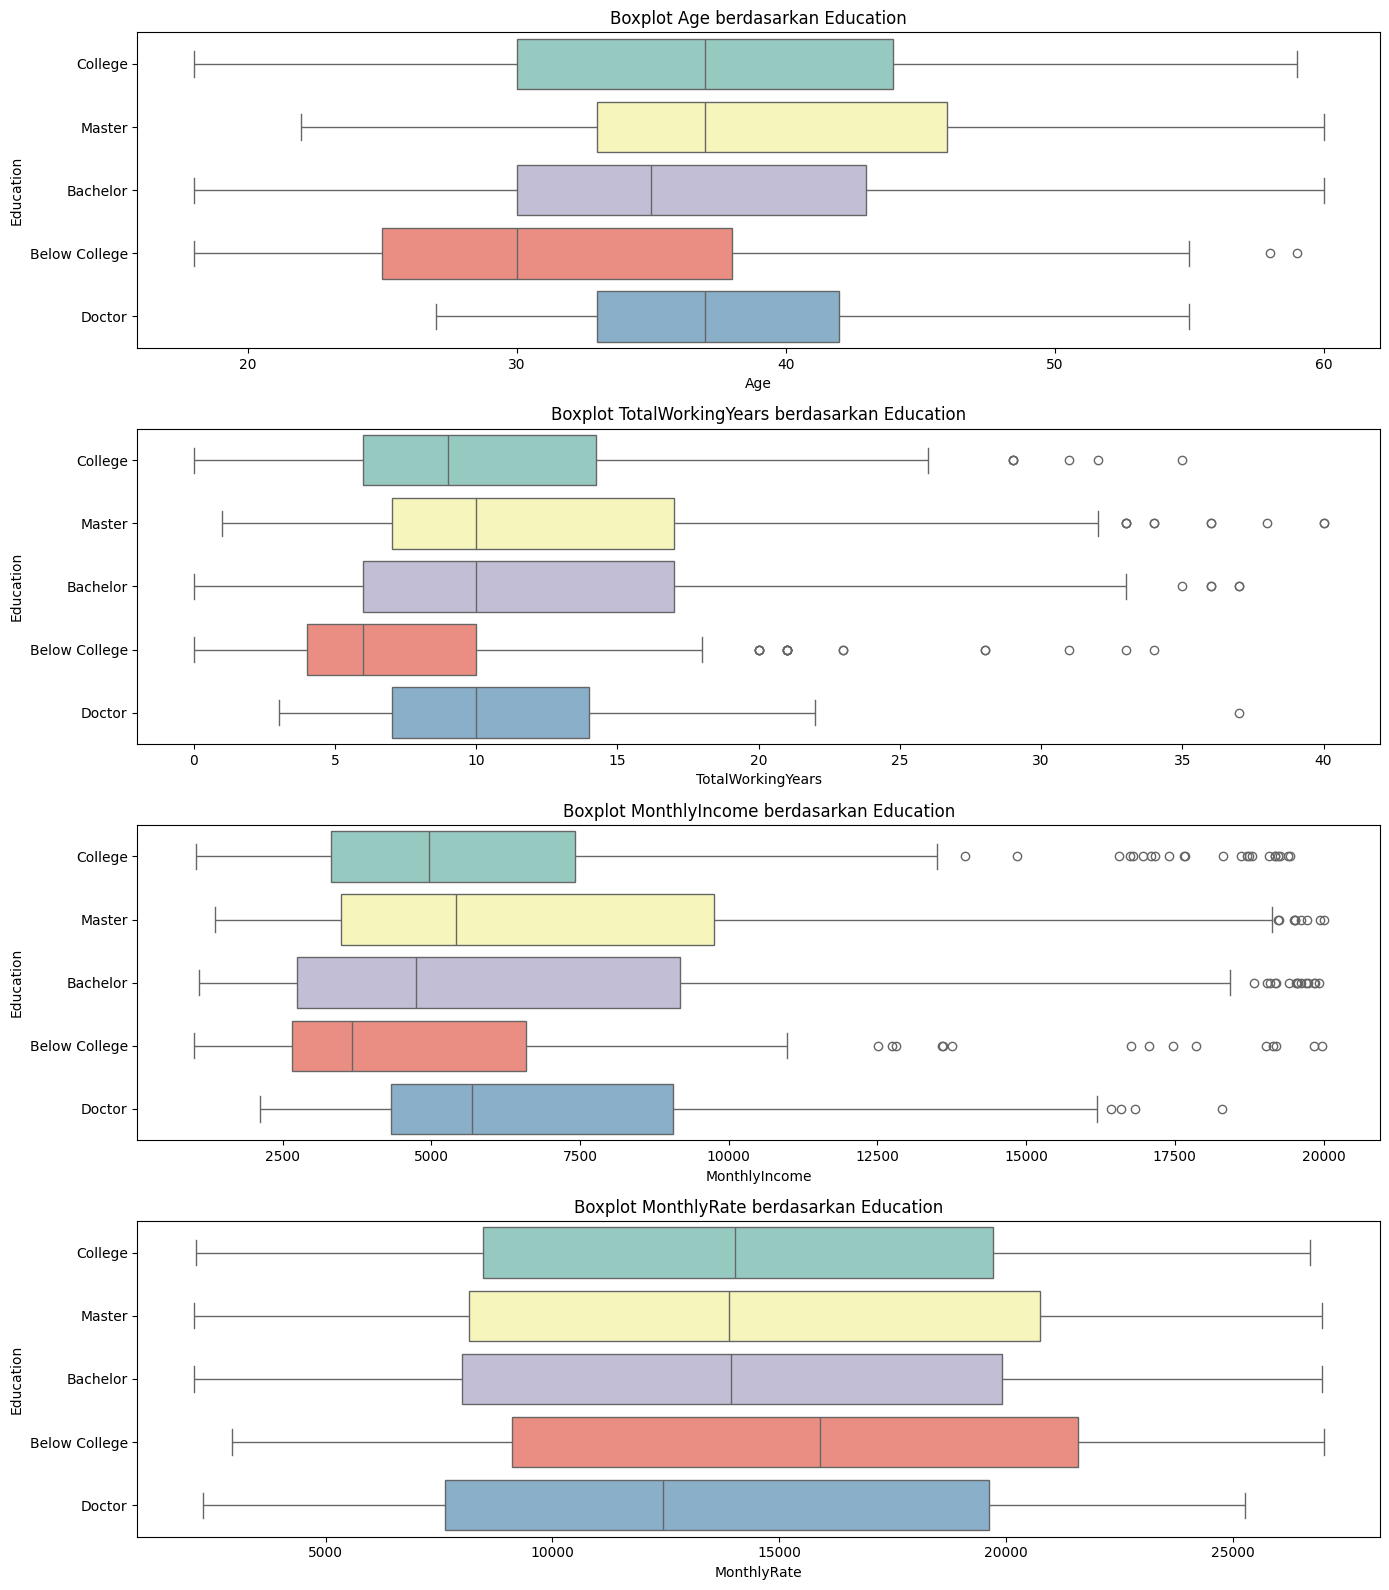

In [ ]:
# Distribusi fitur numerik berdasarkan Education
plot_numerical_box(
    features=["Age", "TotalWorkingYears", "MonthlyIncome", "MonthlyRate"],
    df=df,
    segment_by="Education"
)

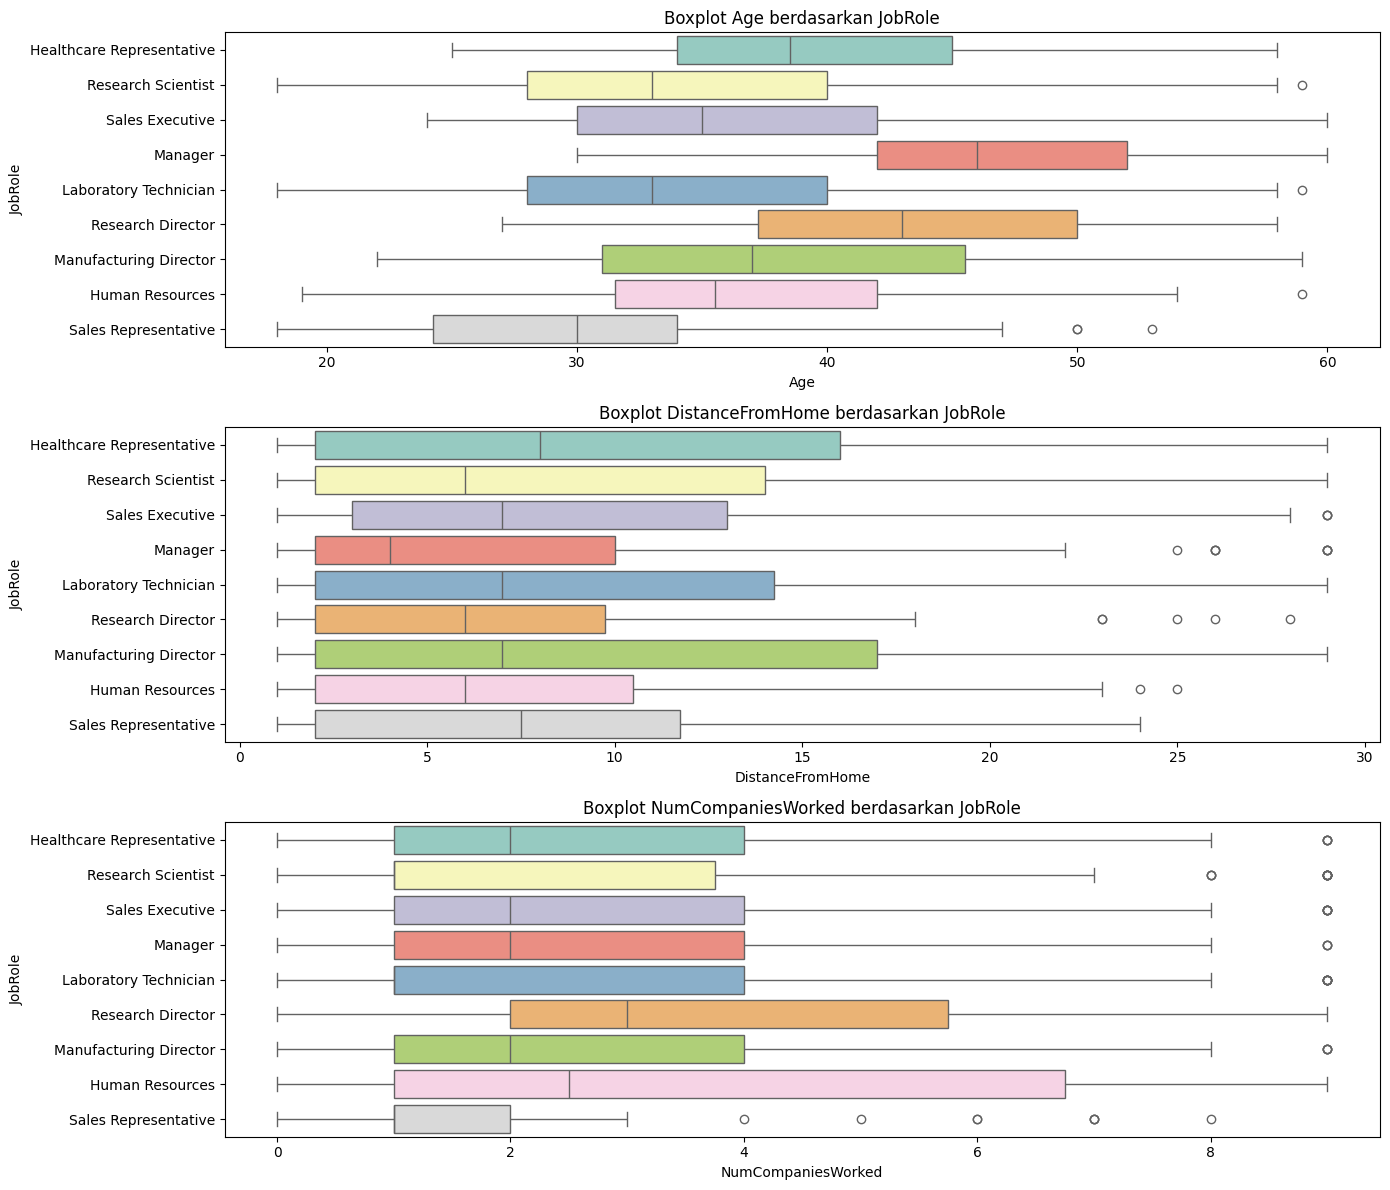

In [ ]:
# Distribusi fitur numerik berdasarkan Job Role (1)
plot_numerical_box(
    features=["Age", "DistanceFromHome", "NumCompaniesWorked"],
    df=df,
    segment_by="JobRole"
)

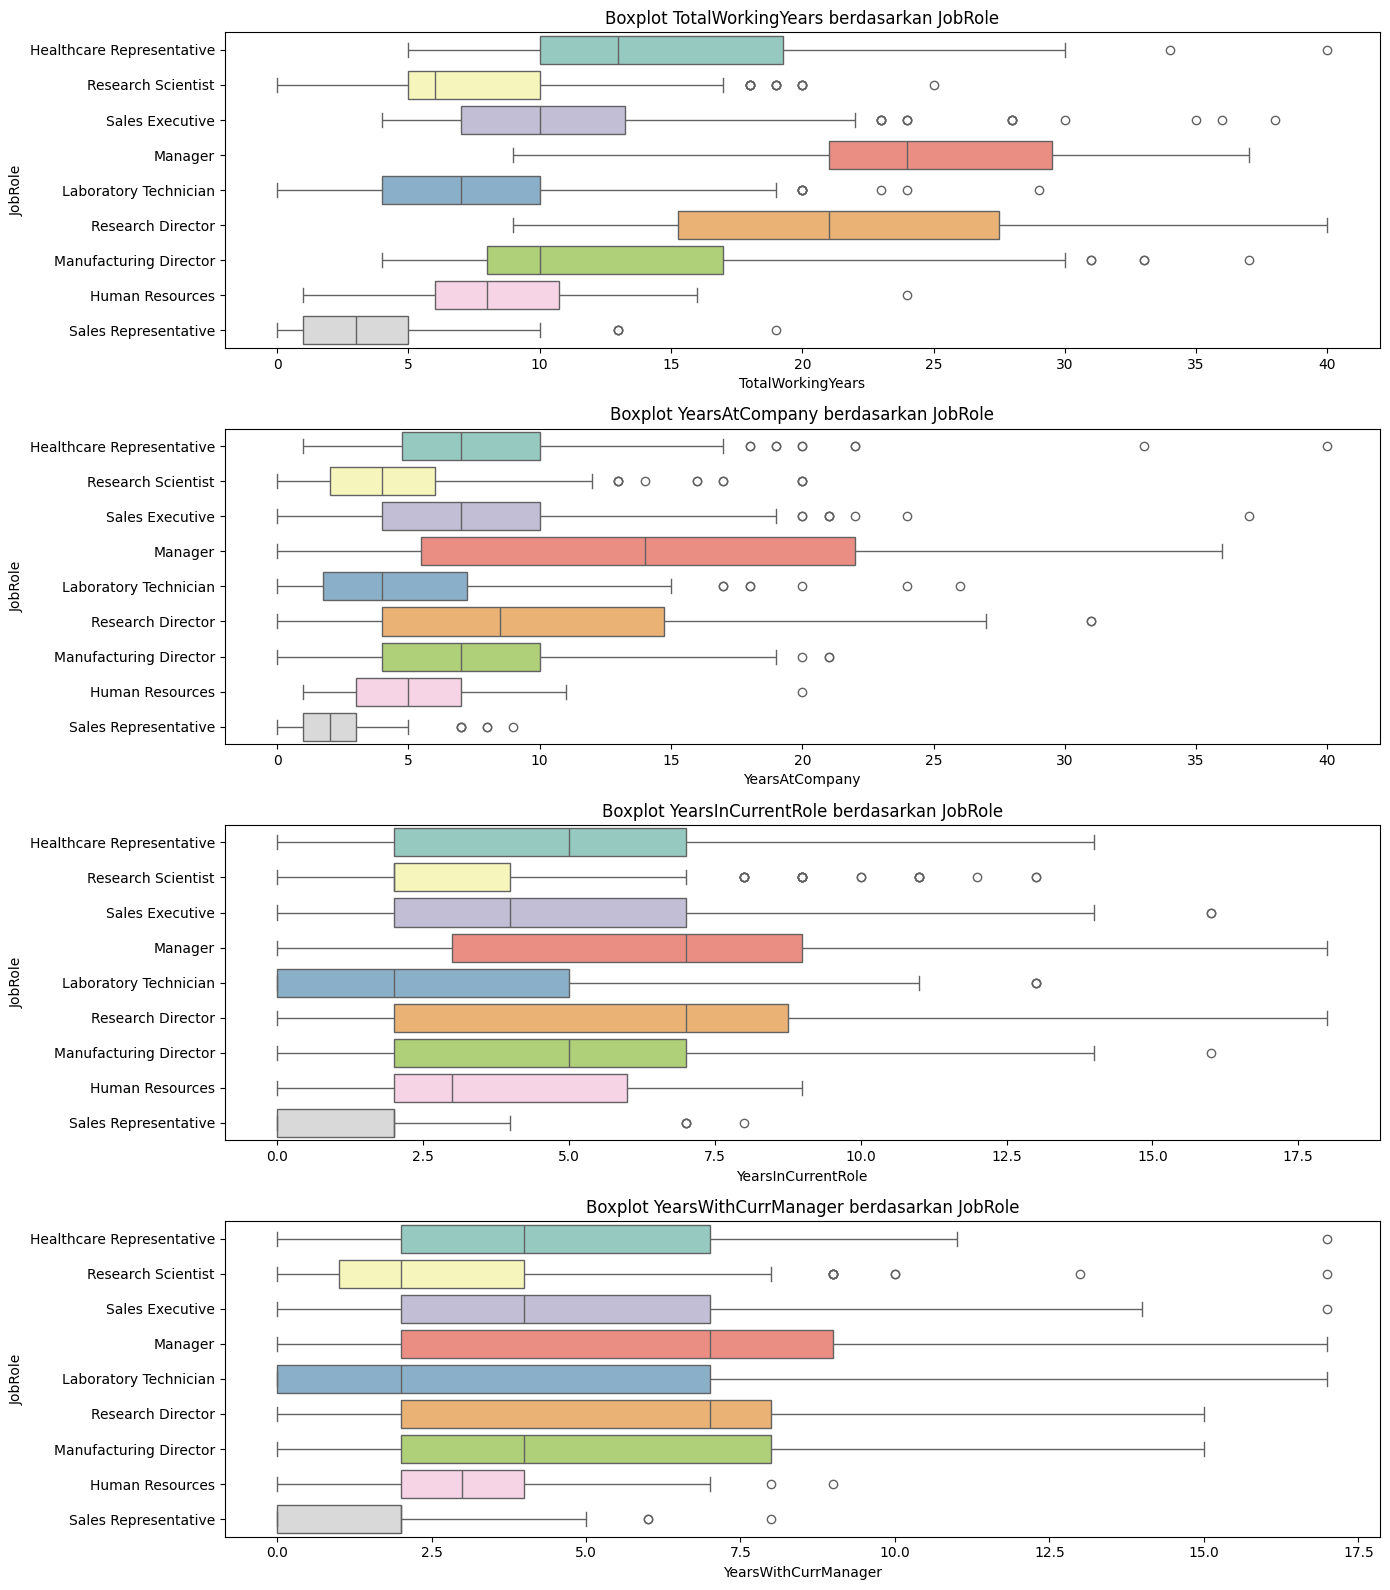

In [ ]:
# Distribusi fitur numerik berdasarkan JobRole (2)
plot_numerical_box(
    features=["TotalWorkingYears", "YearsAtCompany", "YearsInCurrentRole", "YearsWithCurrManager"],
    df=df,
    segment_by="JobRole"
)

Berikutnya membuat visualisasi distribusi data kategorikal menggunakan bar chart. Bar chart berguna untuk menganalisis distribusi kategori dalam fitur, membandingkan frekuensi antara kategori yang berbeda, dan memberikan gambaran visual yang jelas tentang proporsi setiap kategori.

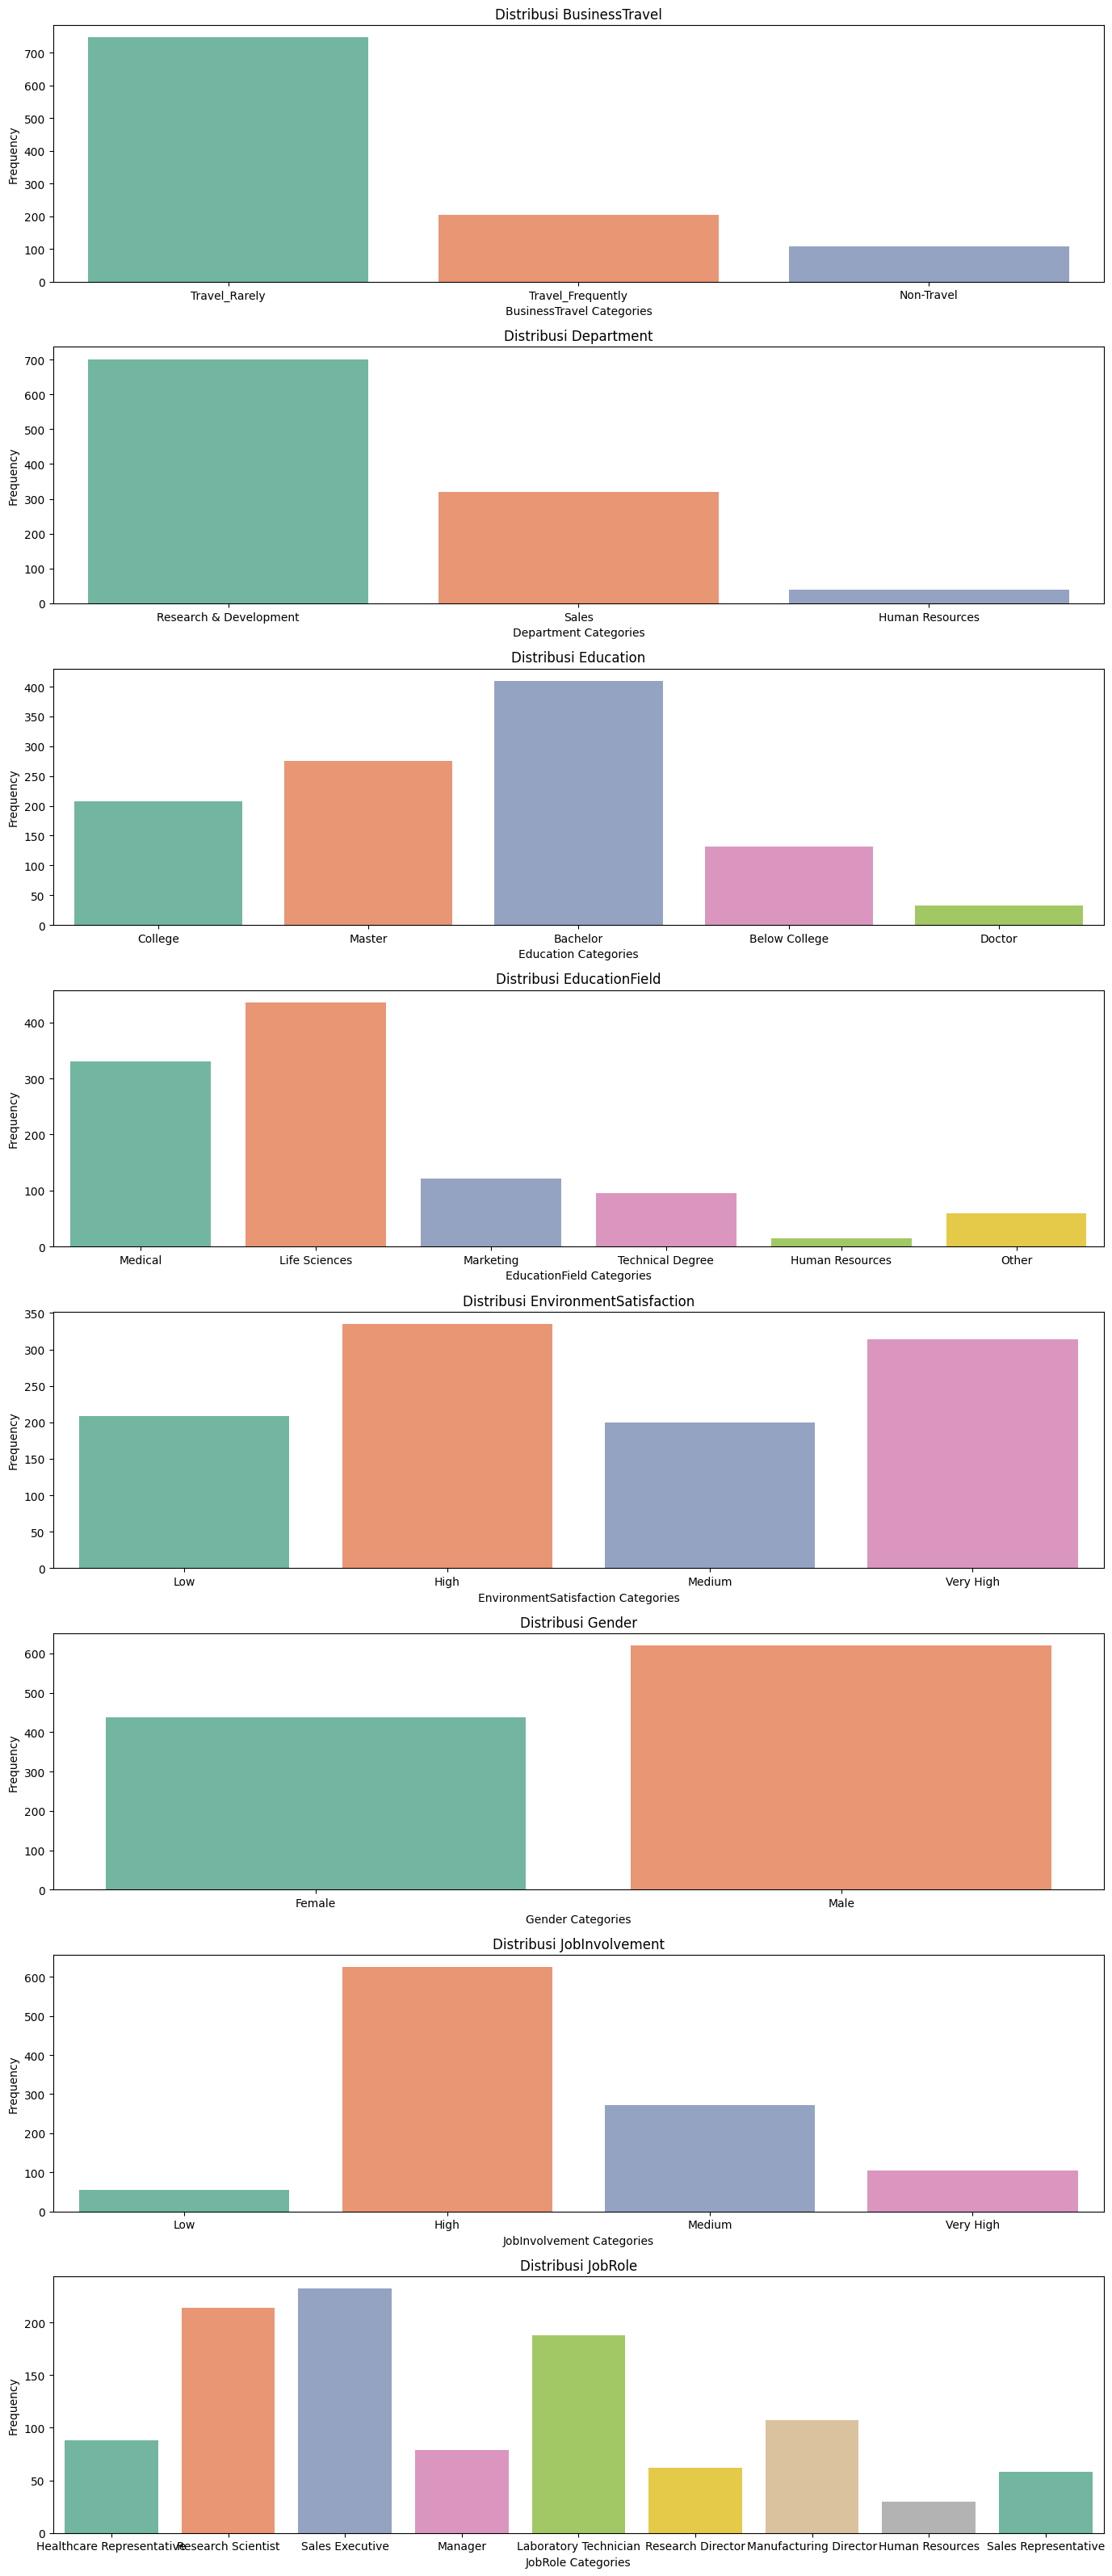

In [ ]:
# Memvisualisasikan distribusi fitur Kategorikal dengan bar chart (1)

# Menyaring fitur kategorikal
fitur_kategorikal = [fitur for fitur in df.columns if df[fitur].dtype == "object"]

# Membatasi fitur kategorikal yang akan ditampilkan
fitur_kategorikal_1 = fitur_kategorikal[:8]

# Menentukan jumlah grafik batang
num_bar_chart = len(fitur_kategorikal_1)
num_rows = num_bar_chart
num_cols = 1

# Membuat subplots untuk grafik batang
fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, num_bar_chart * 4))
axes_flat = axes.flatten()

# Membuat grafik batang untuk setiap fitur kategorikal
for i, (column, ax) in enumerate(zip(fitur_kategorikal_1, axes_flat)):
    sns.countplot(data=df, x=column, ax=ax, hue=column, palette='Set2', legend=False)
    ax.set_title(f'Distribusi {column}', fontsize=12)
    ax.set_xlabel(f'{column} Categories', fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)

# Menyesuaikan layout dan menampilkan grafik
plt.tight_layout()
plt.show()


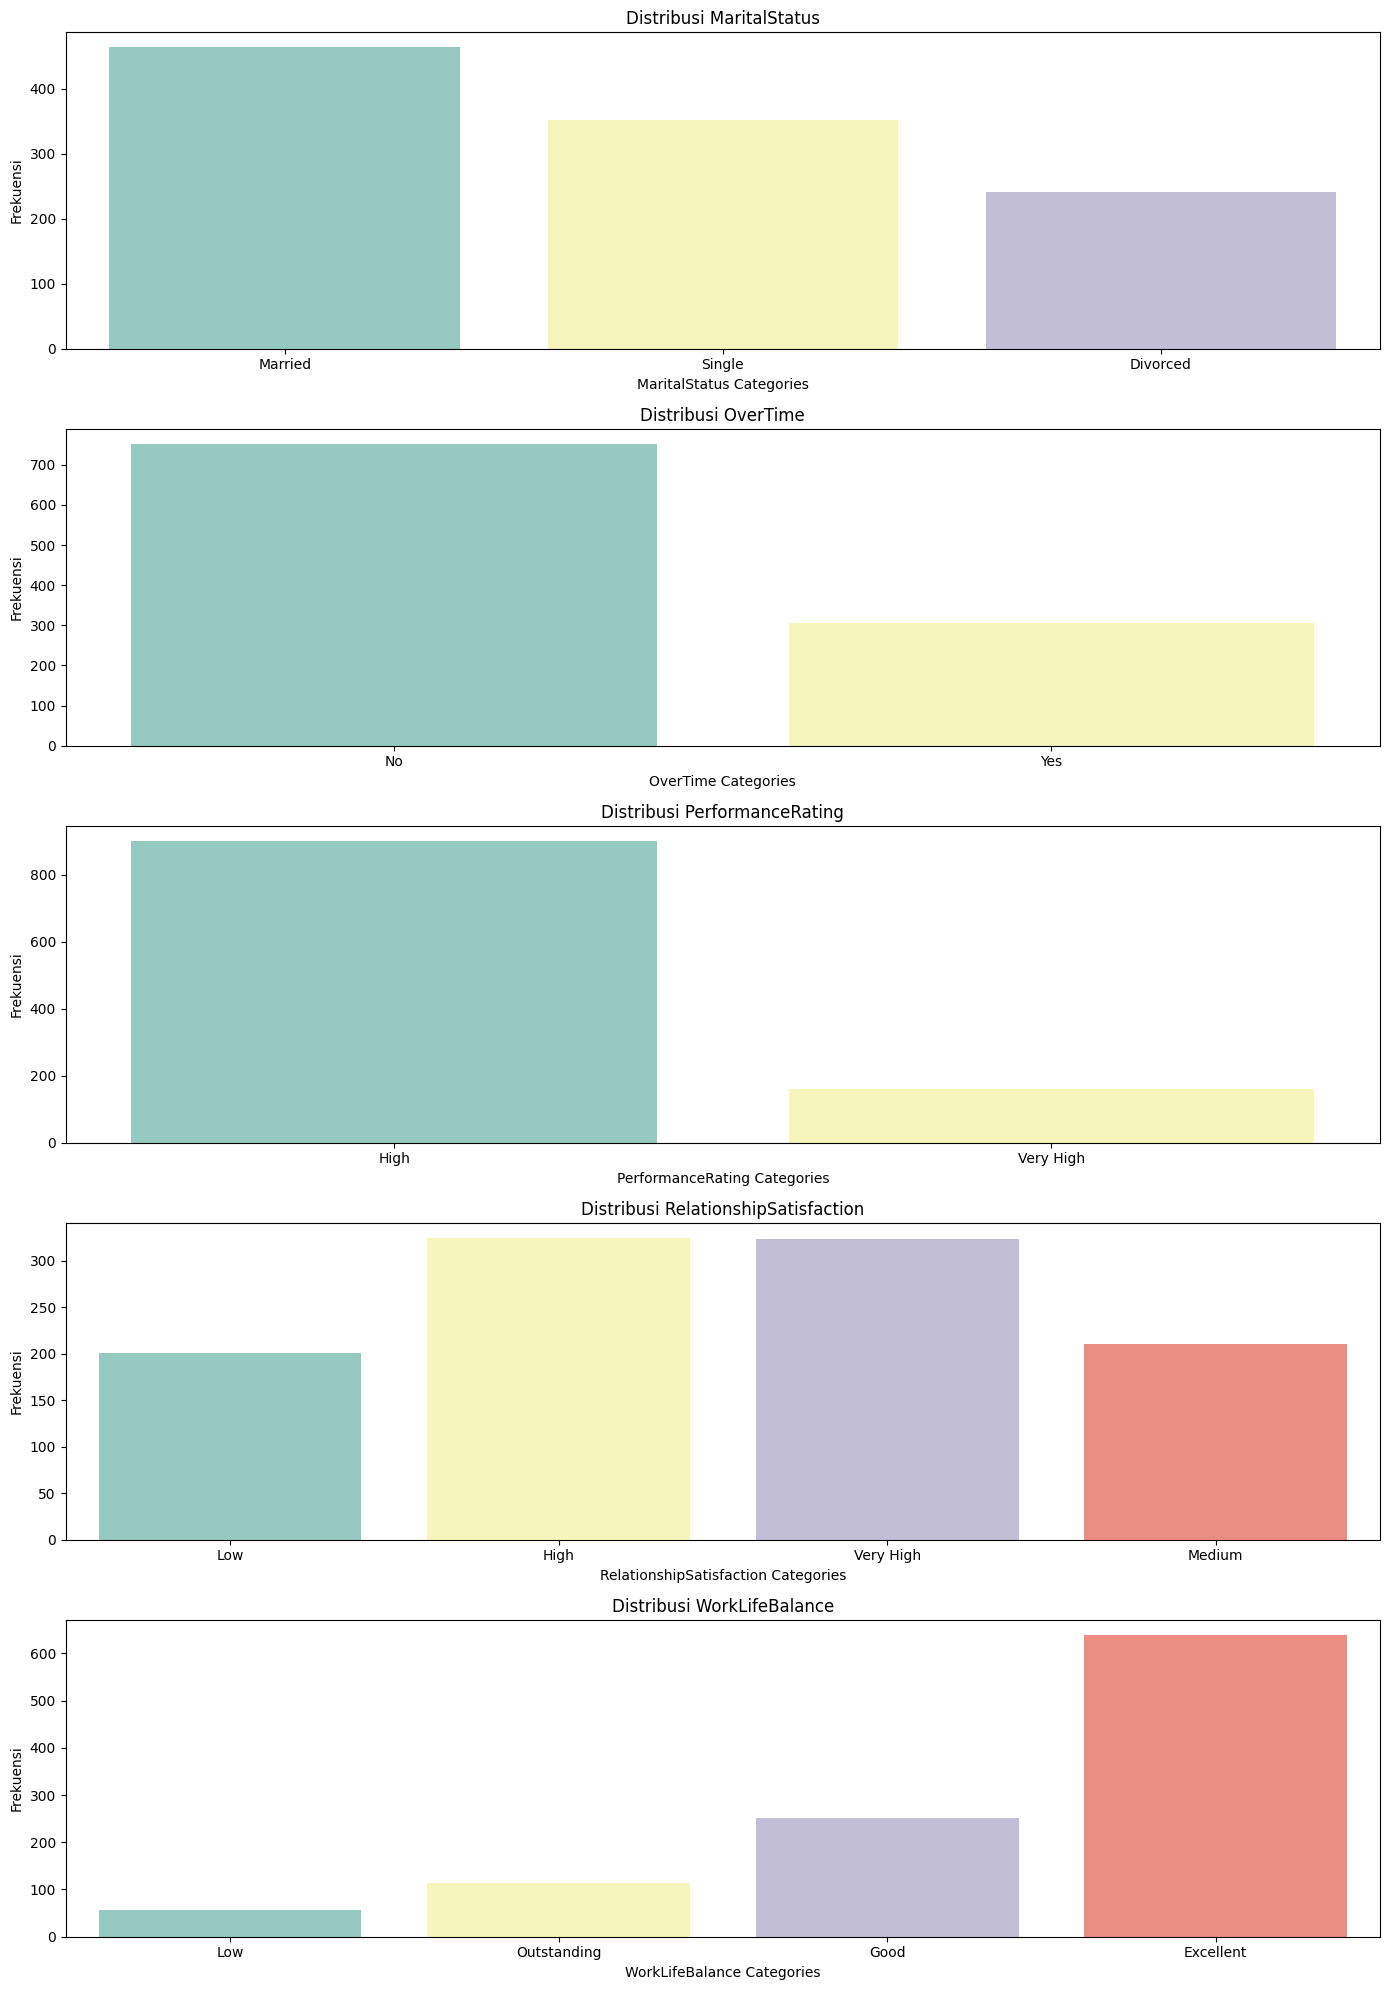

In [ ]:
# Memvisualisasikan distribusi fitur Kategorikal dengan bar chart (2)

# Menyaring fitur kategorikal
fitur_kategorikal_2 = fitur_kategorikal[9:]

# Mendefinisikan jumlah grafik batang & grid
num_bar_chart = len(fitur_kategorikal_2)
num_rows = num_bar_chart
num_cols = 1

# Membuat subplots untuk grafik batang
fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, num_bar_chart * 4))
axes_flat = axes.flatten()

# Membuat grafik batang untuk setiap fitur kategorikal
for i, (column, ax) in enumerate(zip(fitur_kategorikal_2, axes_flat)):
    sns.countplot(data=df, x=column, ax=ax, hue=column, palette='Set3', legend=False)
    ax.set_title(f'Distribusi {column}', fontsize=12)
    ax.set_xlabel(f'{column} Categories', fontsize=10)
    ax.set_ylabel('Frekuensi', fontsize=10)

# Menyesuaikan layout dan menampilkan grafik
plt.tight_layout()
plt.show()


Dari grafik distribusi fitur kategorikal di atas, berikut beberapa insight yang dapat diambil:

1. **BusinessTravel**: Mayoritas data menunjukkan kategori Travel_Rarely, yang berarti sebagian besar individu dalam dataset ini tidak sering melakukan perjalanan bisnis. Kategori Travel_Frequently dan Non-Travel memiliki jumlah yang jauh lebih kecil.

2. **Department**: Sebagian besar karyawan berasal dari departemen Research & Development, diikuti oleh Sales, dan jumlah untuk Human Resources jauh lebih sedikit.

3. **Education**: Sebagian besar individu memiliki gelar Bachelor atau Sarjana, dengan jumlah yang lebih sedikit pada kategori Master dan College. Kategori lainnya memiliki distribusi yang jauh lebih kecil.

4. **EducationField**: Life Sciences dan Medical adalah dua bidang pendidikan yang paling banyak, sedangkan Marketing dan Technical Degree memiliki distribusi yang lebih sedikit.

5. **EnvironmentSatisfaction**: Mayoritas individu memiliki tingkat kepuasan lingkungan kerja yang tinggi, dengan kategori High dan Very High yang dominan. Low memiliki jumlah yang lebih sedikit.

6. **Gender**: Dataset ini didominasi oleh karyawan Pria atau Male, dengan lebih sedikit karyawan Wanita atau Female.

7. **JobInvolvement**: Mayoritas individu memiliki tingkat keterlibatan pekerjaan yang tinggi, diikuti oleh kategori Medium dan Low.

8. **JobRole**: Sales Executive dan Healthcare Representative adalah dua peran yang paling umum dalam dataset, sementara beberapa peran lain seperti Research Director memiliki jumlah yang jauh lebih sedikit.

9. **MaritalStatus**: Sebagian besar individu dalam dataset ini sudah menikah, dengan lebih sedikit yang belum menikah atau single dan yang bercerai atau divorced.

10. **OverTime**: Hampir semua individu tidak bekerja lembur, sementara hanya sedikit yang bekerja lembur.

11. **PerformanceRating**: Mayoritas karyawan memiliki penilaian kinerja yang tinggi, dengan sangat sedikit yang memiliki penilaian Very High.

12. **RelationshipSatisfaction**: Sebagian besar individu memiliki tingkat kepuasan hubungan kerja yang tinggi, dengan sedikit yang mengalami kepuasan Low atau Medium".

13. **WorkLifeBalance**: Mayoritas individu memiliki keseimbangan kerja-hidup yang sangat baik, diikuti oleh "Good". Keseimbangan yang rendah sangat jarang.

Selanjutnya membuat sebuah helper function untuk memvisualisasikan distribusi fitur kategorikal yang lain.

In [ ]:
#  Membuat sebuah helper function bernama categorical_plot
def categorical_plot(features, df, segment_feature=None, colors=None):
    fig, ax = plt.subplots(len(features), 1, figsize=(16, 20))

    for i, feature in enumerate(features):
        if segment_feature:
            sns.countplot(data=df, x=segment_feature, hue=feature, ax=ax[i], palette=colors)
            ax[i].set_title(f'Grafik {feature} berdasarkan {segment_feature}', fontsize=14)
            ax[i].set_xlabel(segment_feature, fontsize=10)
        else:
            sns.countplot(data=df, x=feature, ax=ax[i], palette=colors)
            ax[i].set_title(f'Grafik {feature}', fontsize=14)
            ax[i].set_xlabel(feature, fontsize=10)

    plt.tight_layout()
    plt.show()

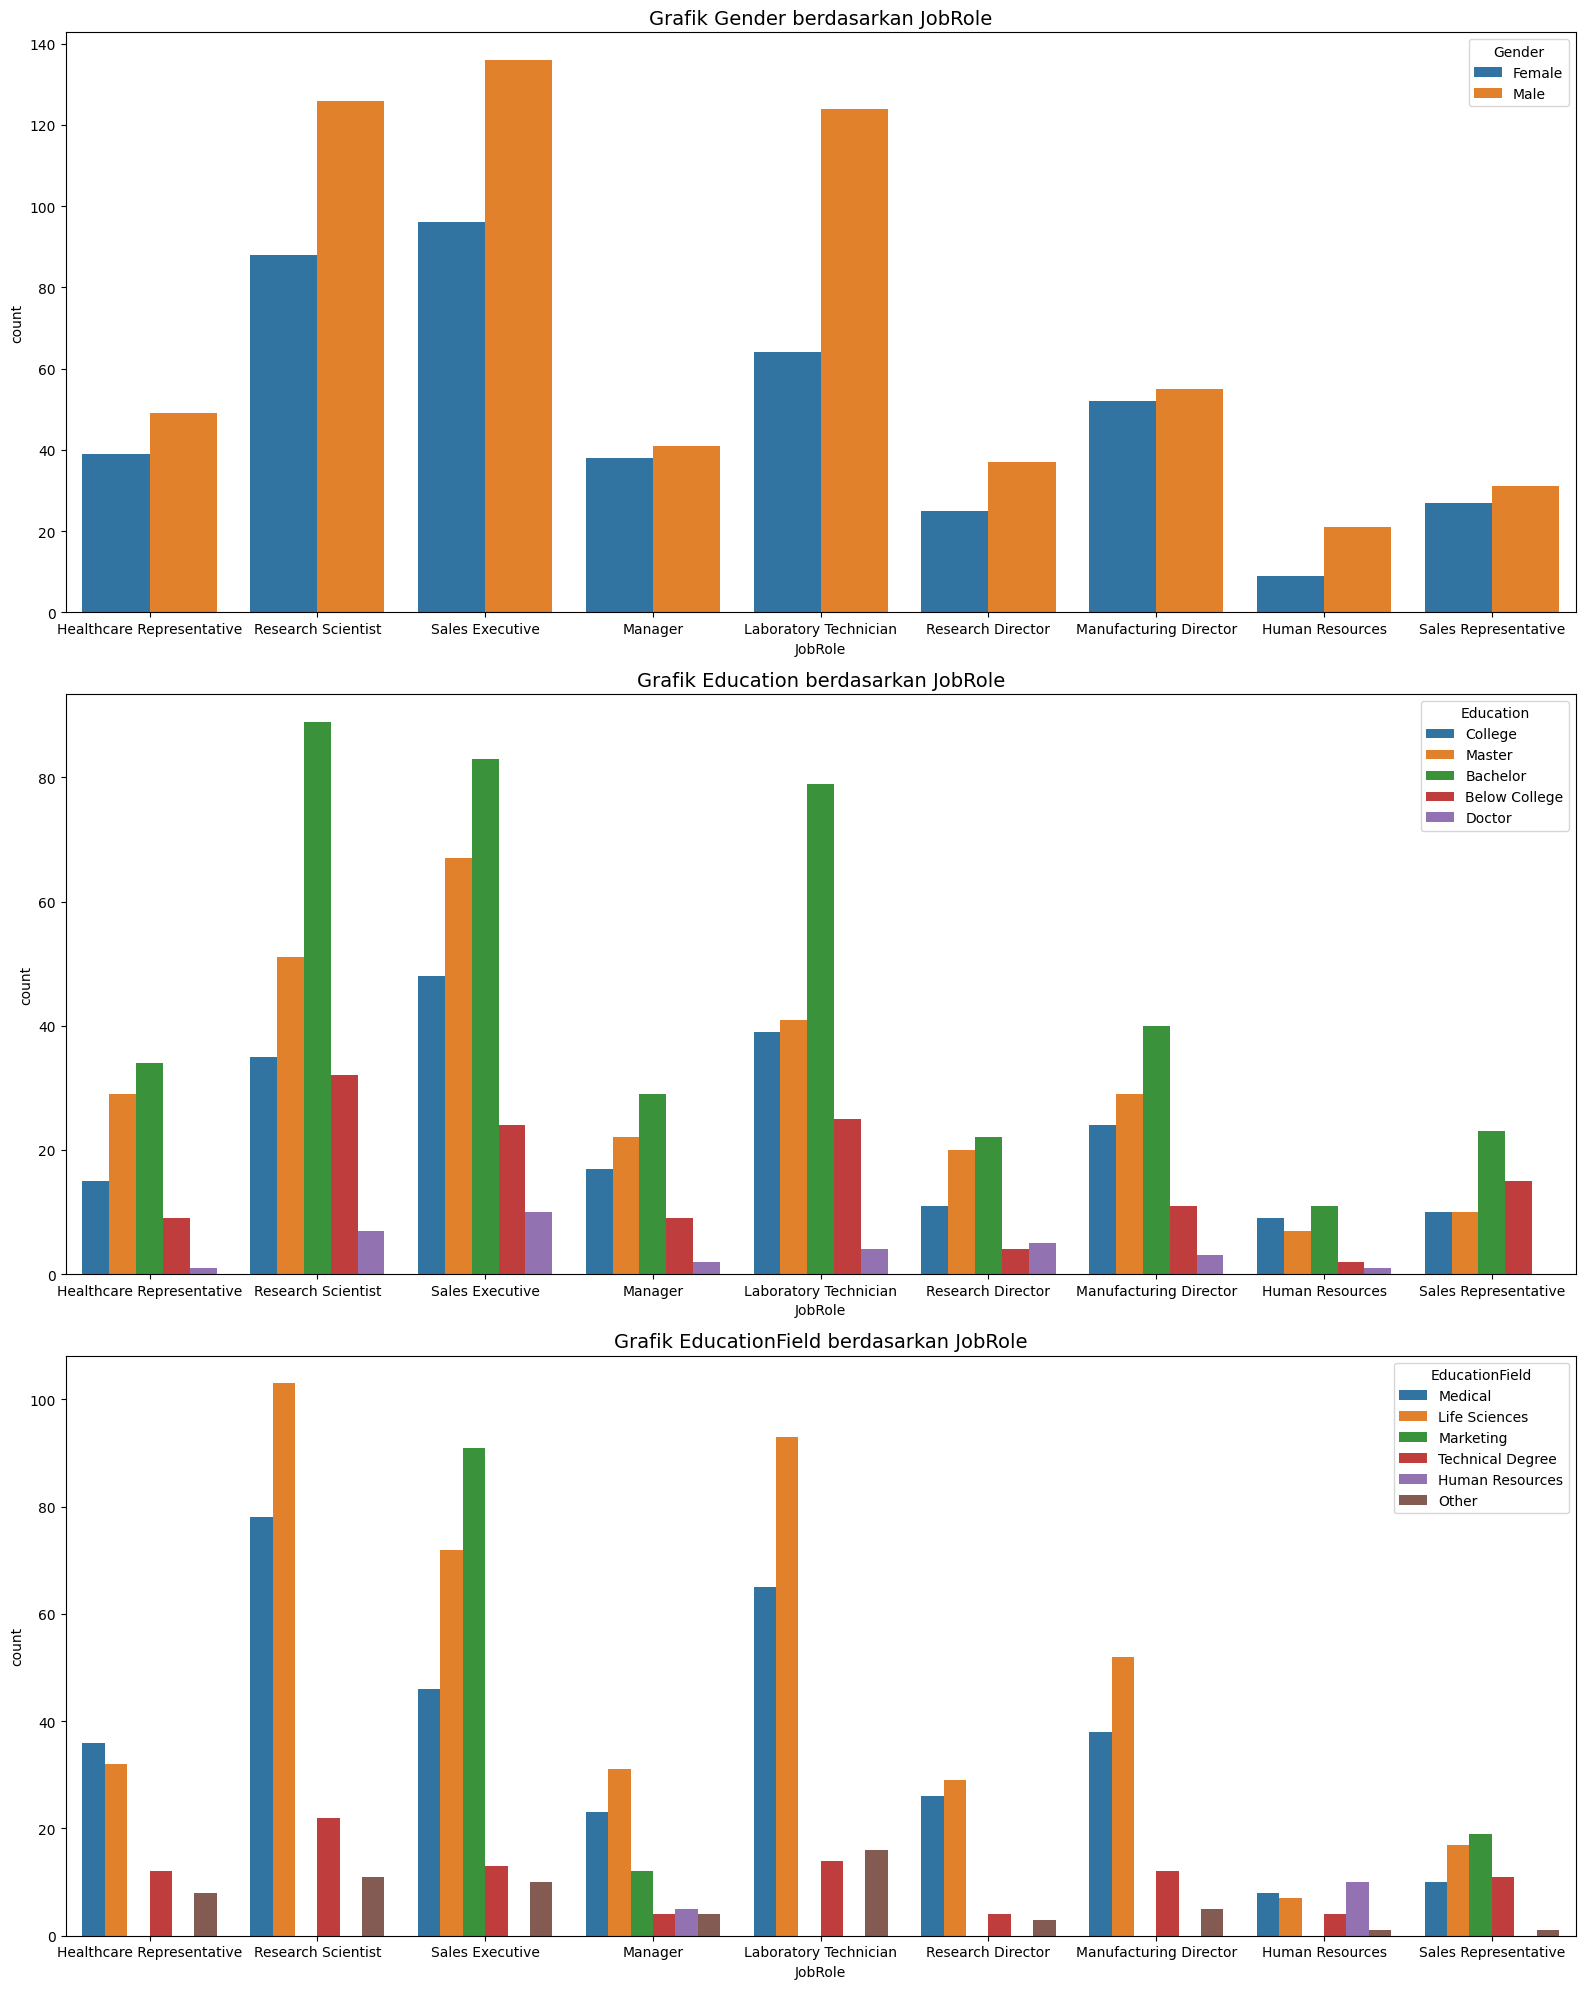

In [ ]:
# Distribusi fitur kategorikal berdasarkan Job Role
categorical_plot(
    features=["Gender", "Education", "EducationField"],
    df=df,
    segment_feature="JobRole"
)

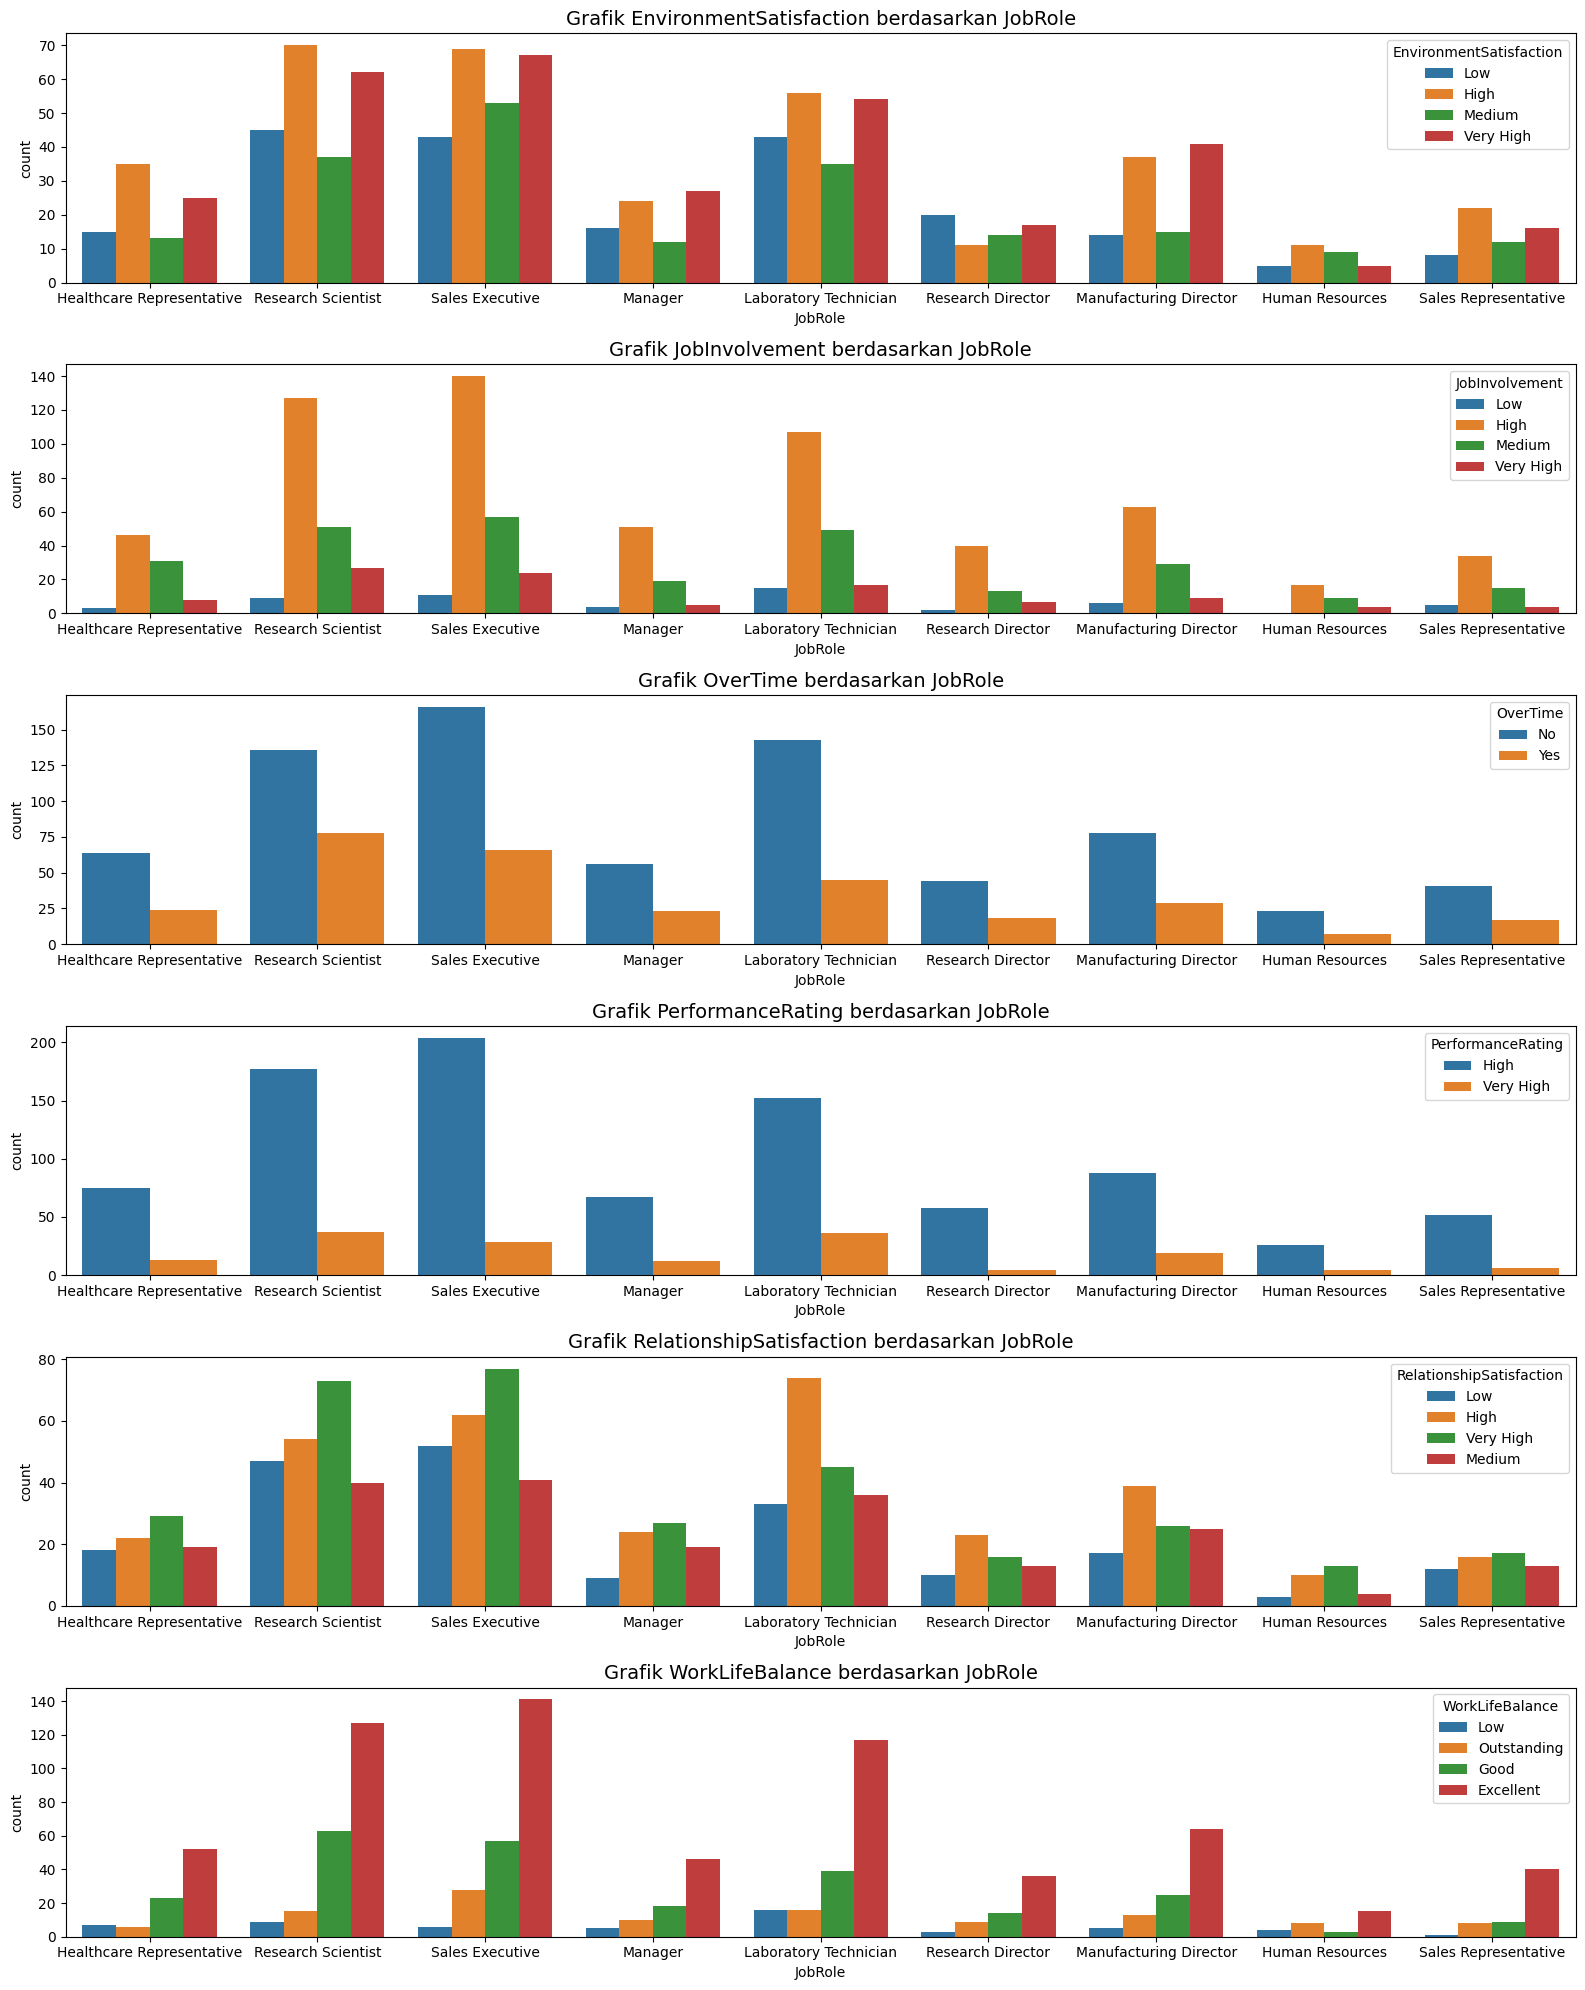

In [ ]:
# Distribusi fitur kategorikal berdasarkan Job Role (2)
categorical_plot(
    features=["EnvironmentSatisfaction","JobInvolvement","OverTime","PerformanceRating","RelationshipSatisfaction","WorkLifeBalance"],
    df=df,
    segment_feature="JobRole"
)

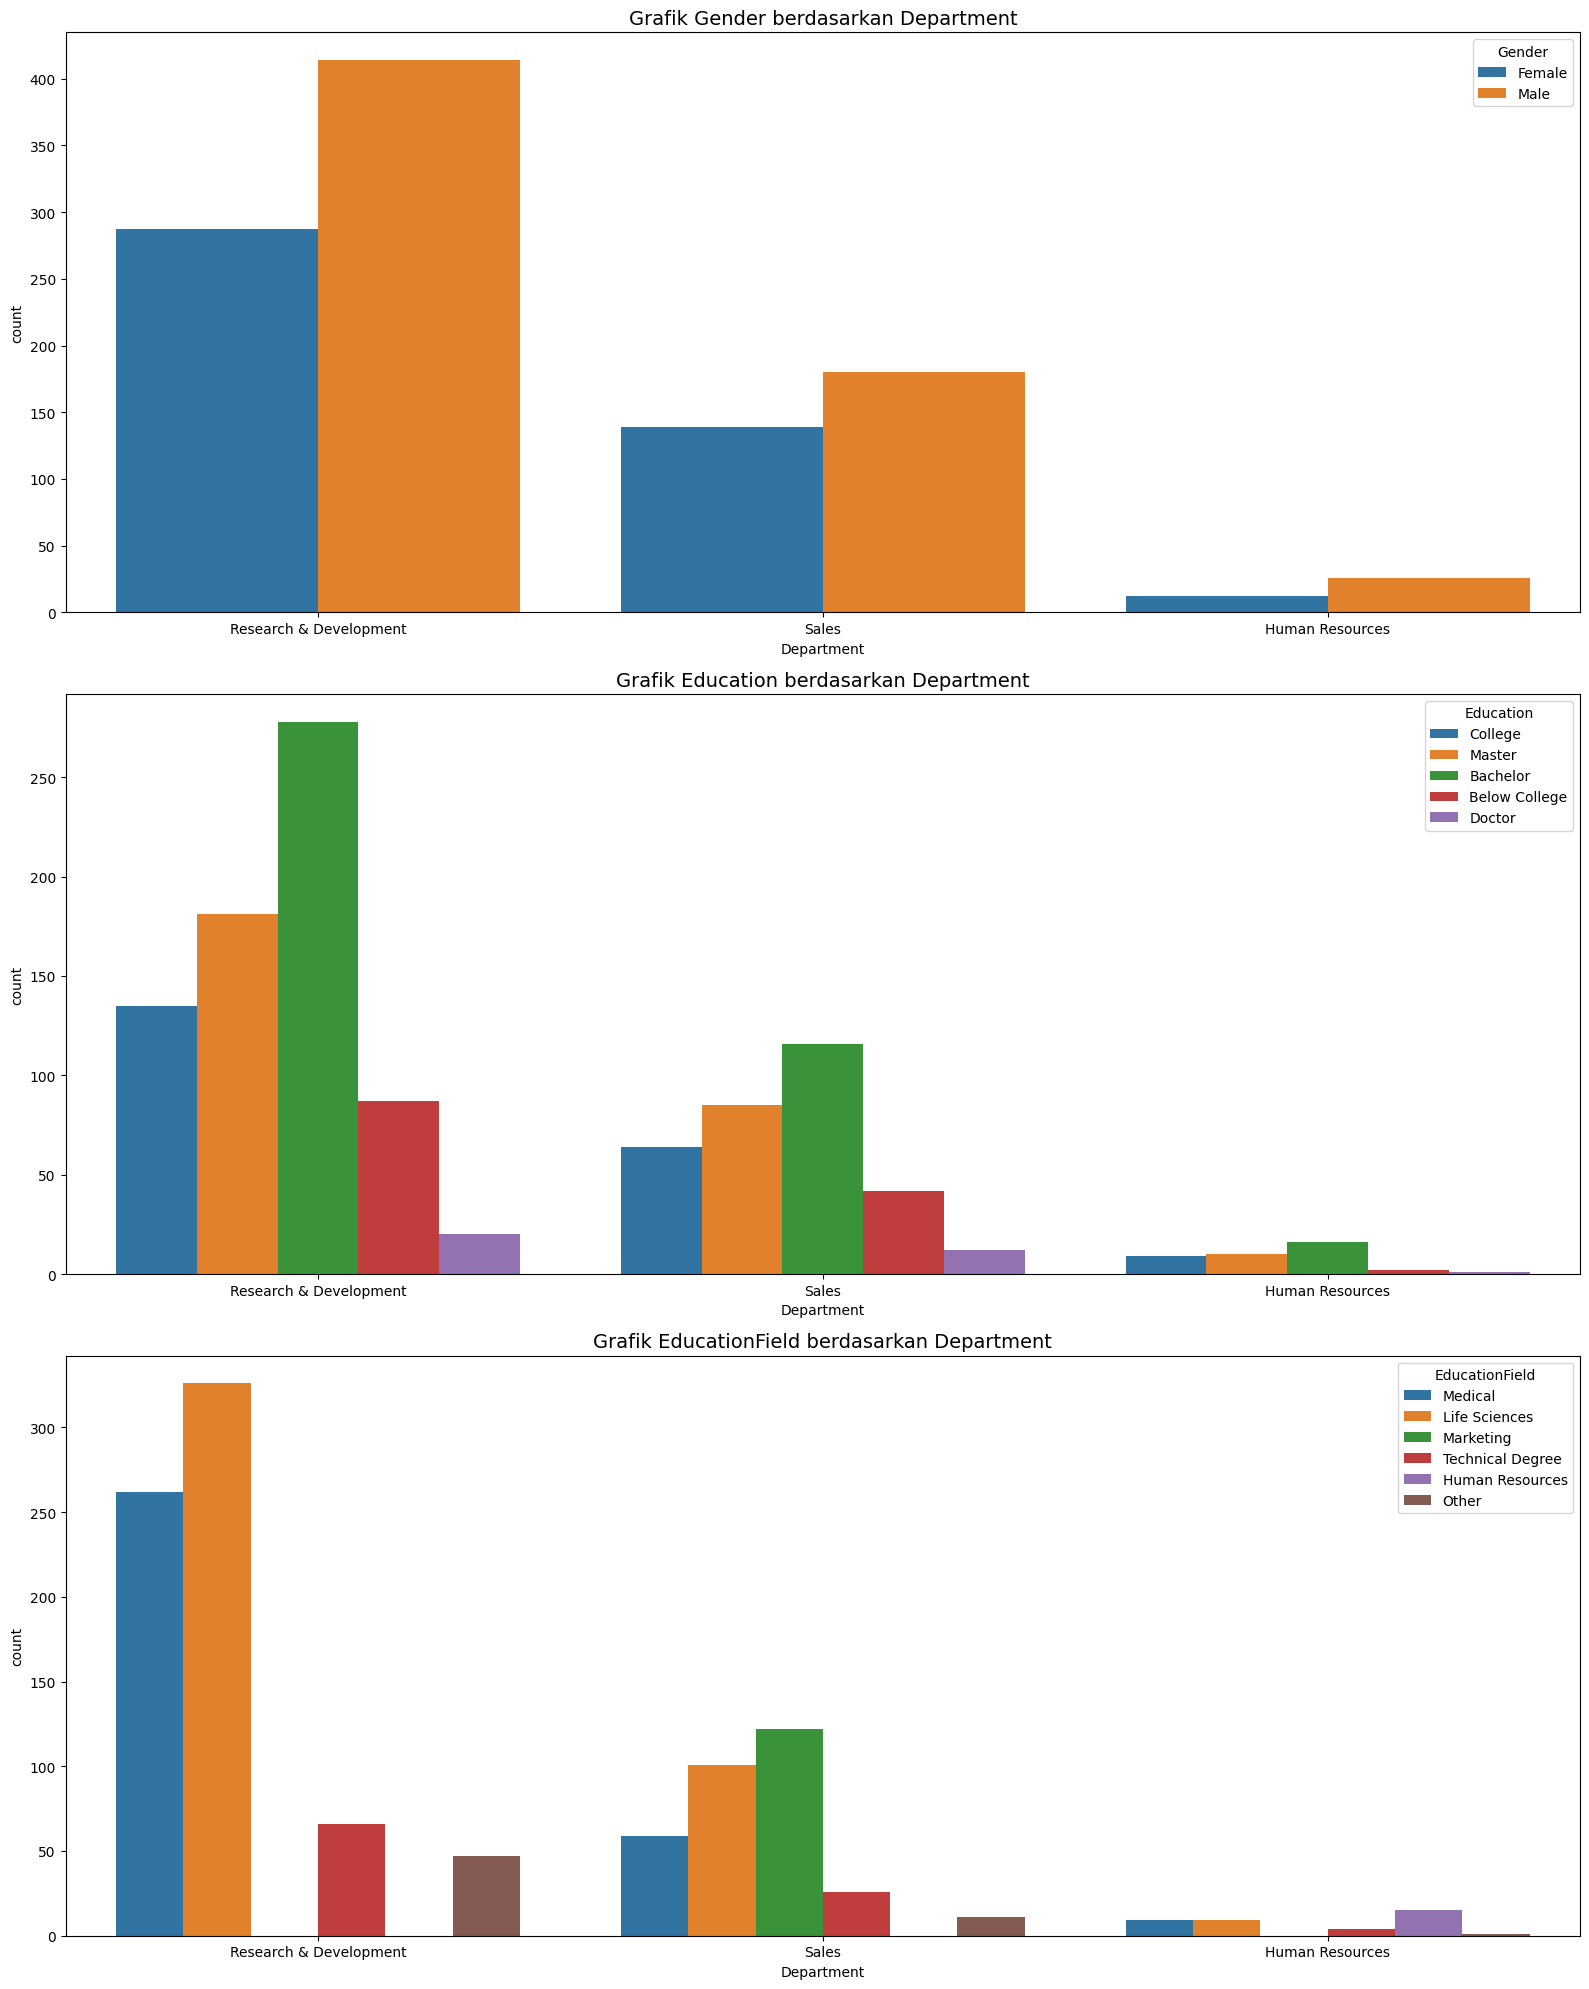

In [ ]:
# Distribusi fitur kategorikal berdasarkan Department (1)
categorical_plot(
    features=["Gender", "Education", "EducationField"],
    df=df,
    segment_feature="Department"
)

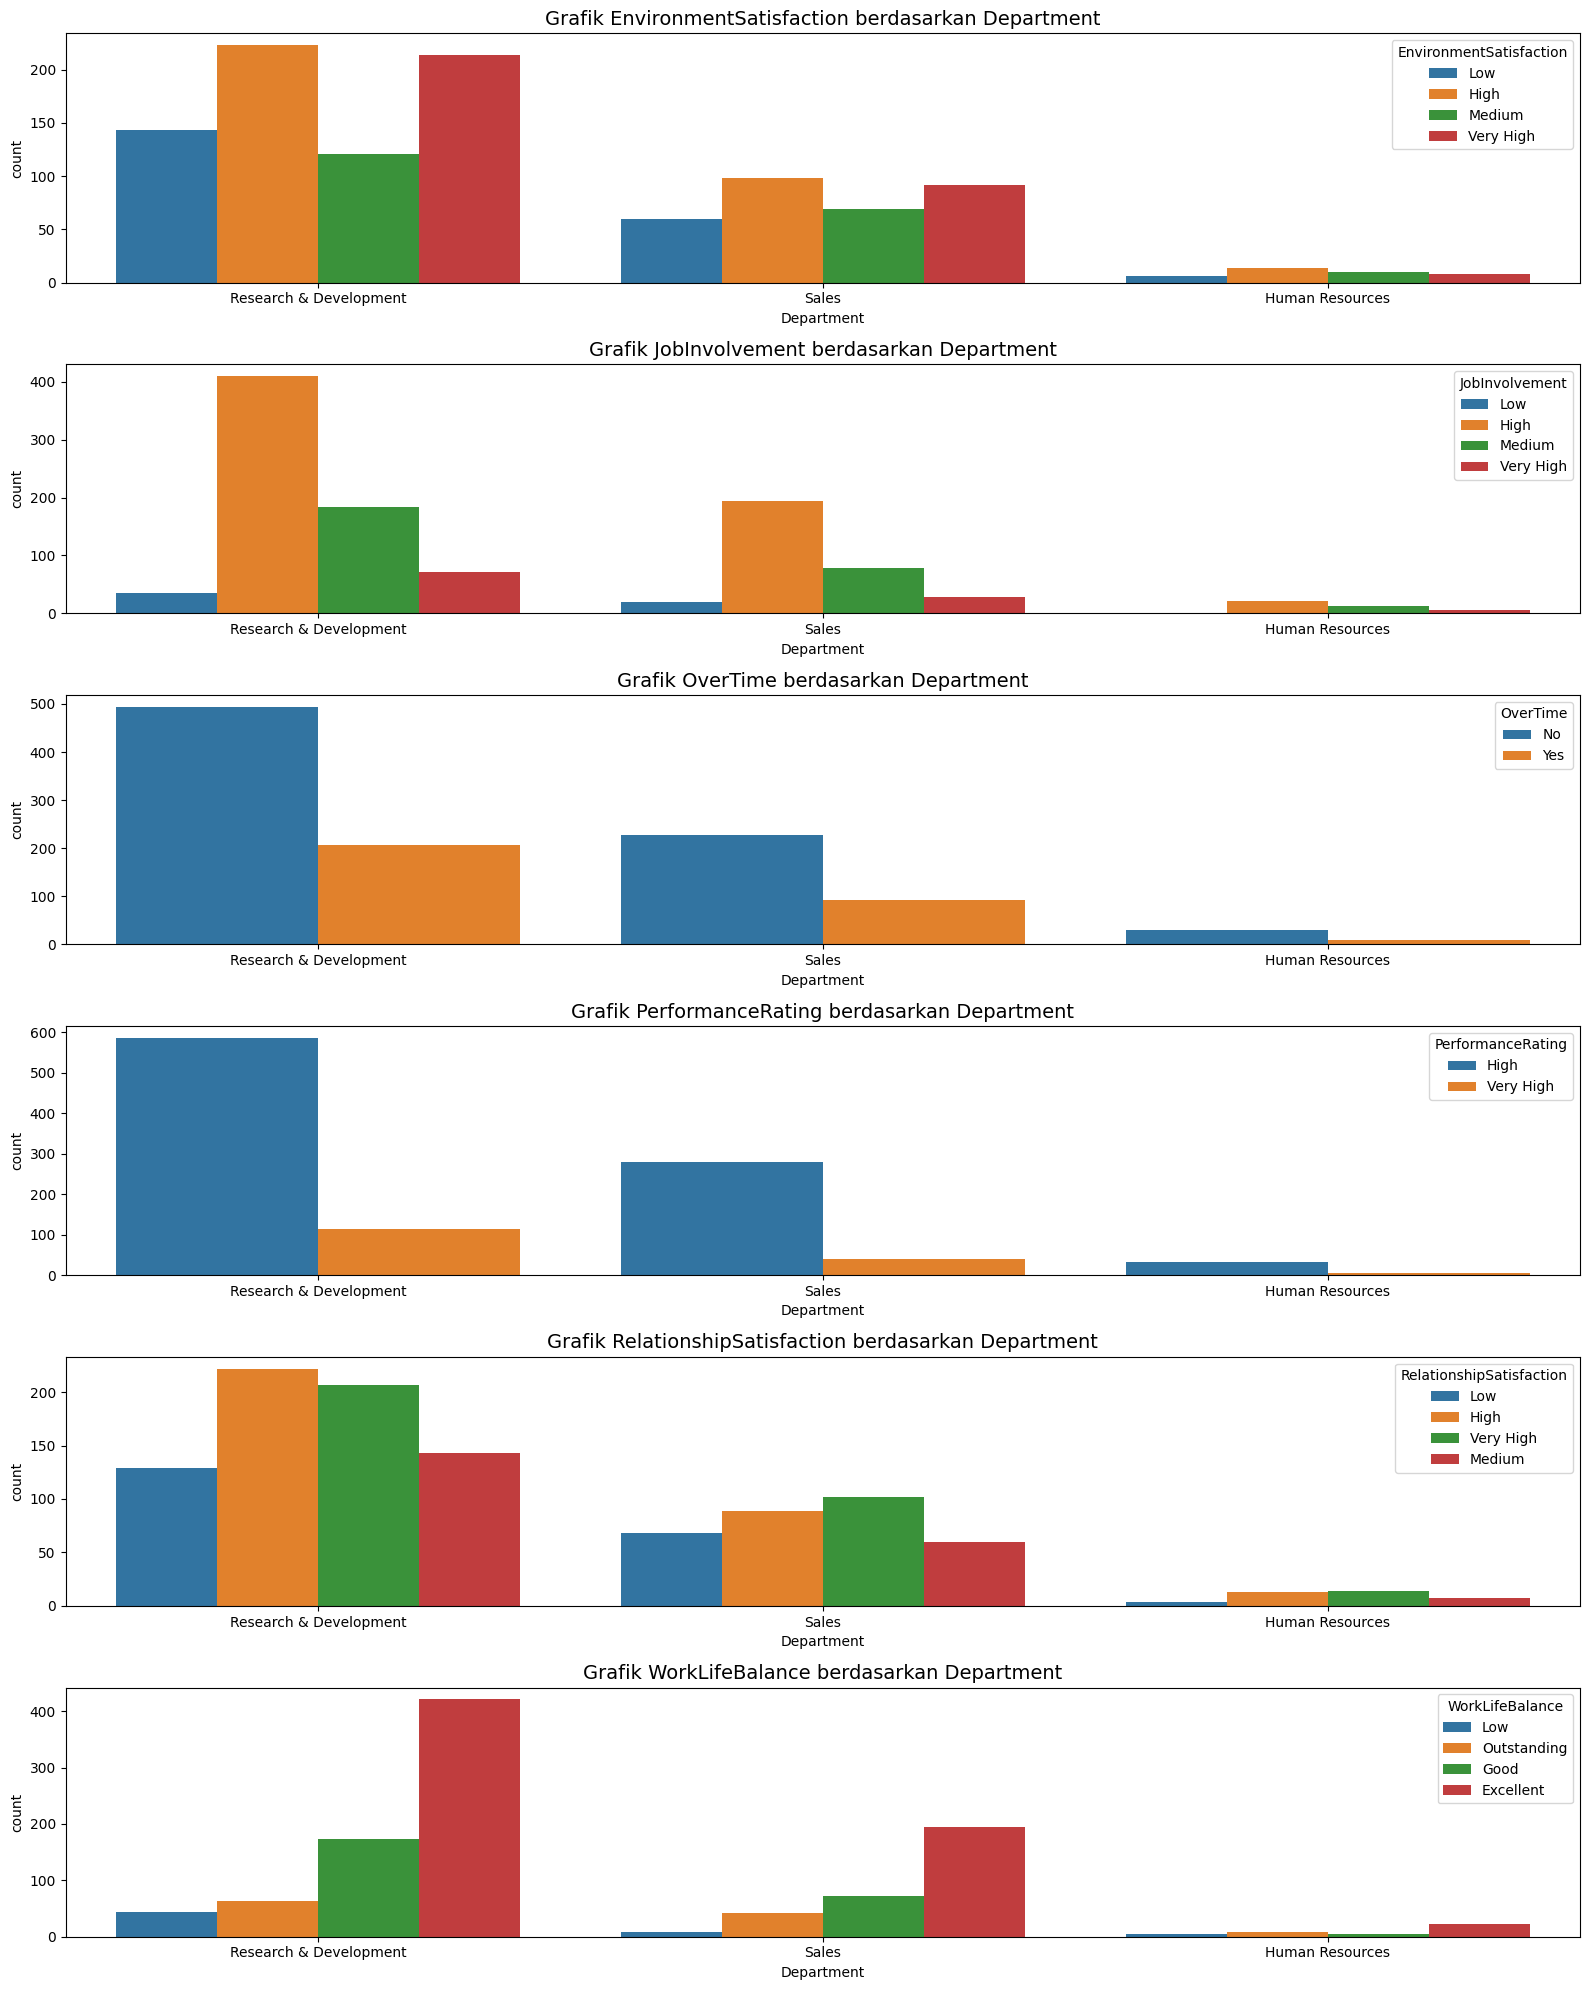

In [ ]:
# Distribusi fitur kategorikal berdasarkan Department (2)
categorical_plot(
    features=["EnvironmentSatisfaction","JobInvolvement","OverTime","PerformanceRating","RelationshipSatisfaction","WorkLifeBalance"],
    df=df,
    segment_feature="Department"
)

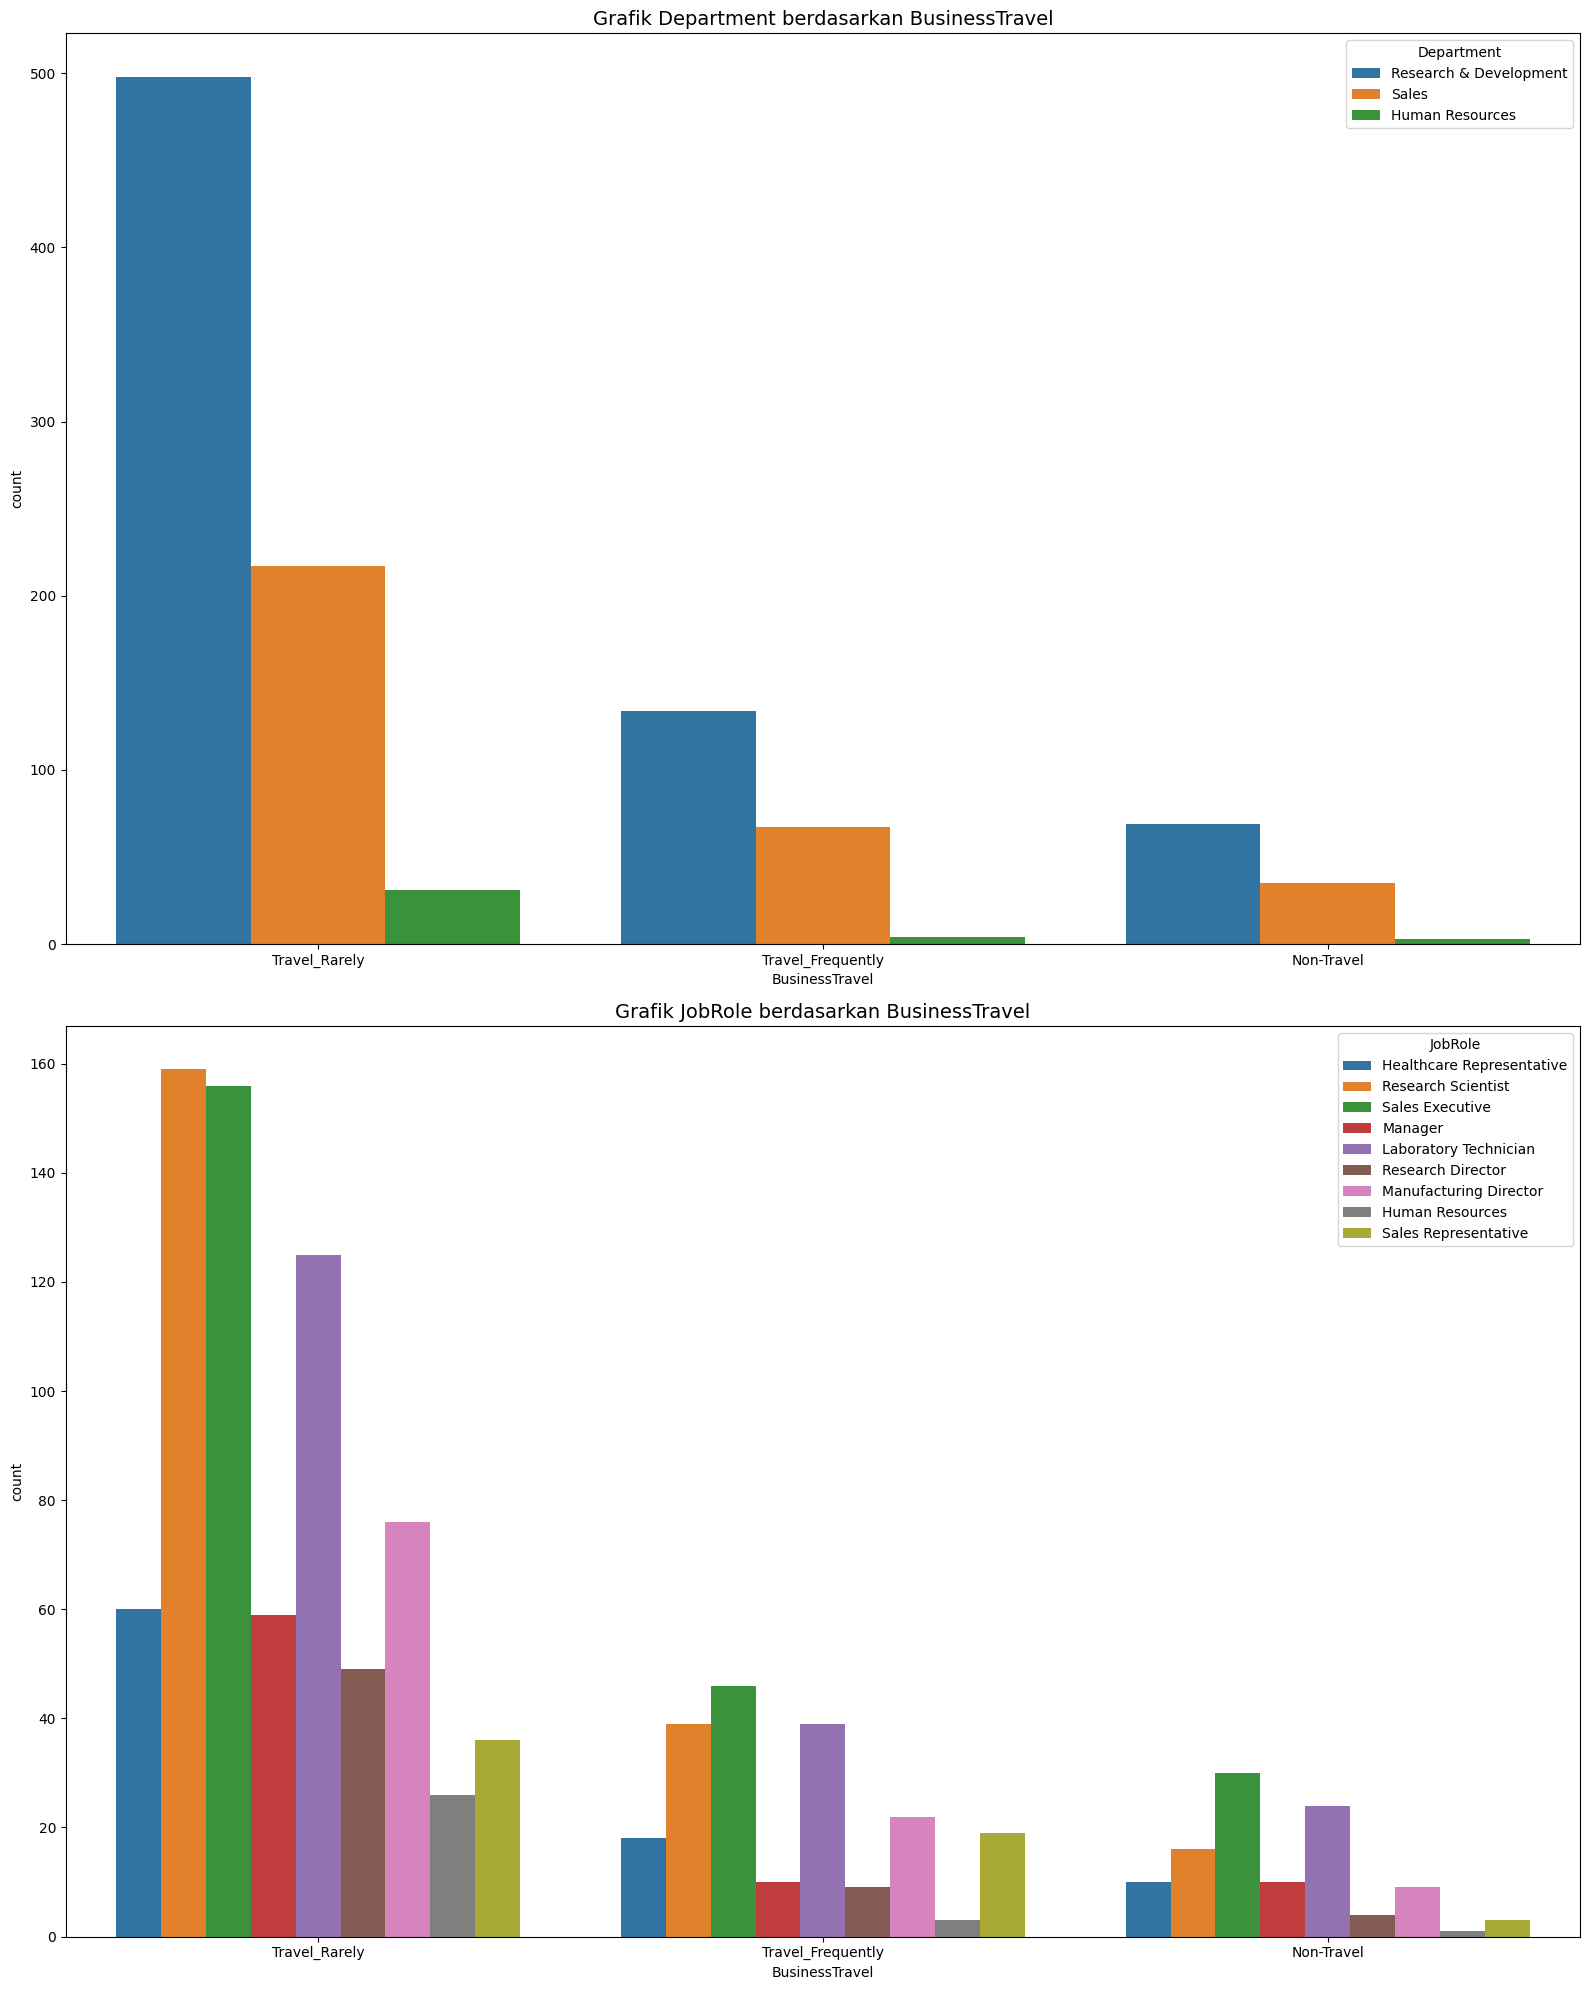

In [ ]:
# Distribusi fitur kategorikal berdasarkan Business Travel
categorical_plot(
    features=["Department", "JobRole"],
    df=df,
    segment_feature="BusinessTravel"
)

In [ ]:
def plot_count(feature, df, segment_feature, palette='coolwarm', title_fontsize=16, label_fontsize=12):
    plt.figure(figsize=(10, 7))
    sns.countplot(data=df, x=feature, hue=segment_feature, palette=palette)
    plt.title(f'Jumlah {feature} berdasarkan {segment_feature}', fontsize=title_fontsize)
    plt.xlabel(feature, fontsize=label_fontsize)
    plt.ylabel('Count', fontsize=label_fontsize)
    plt.tight_layout()
    plt.show()

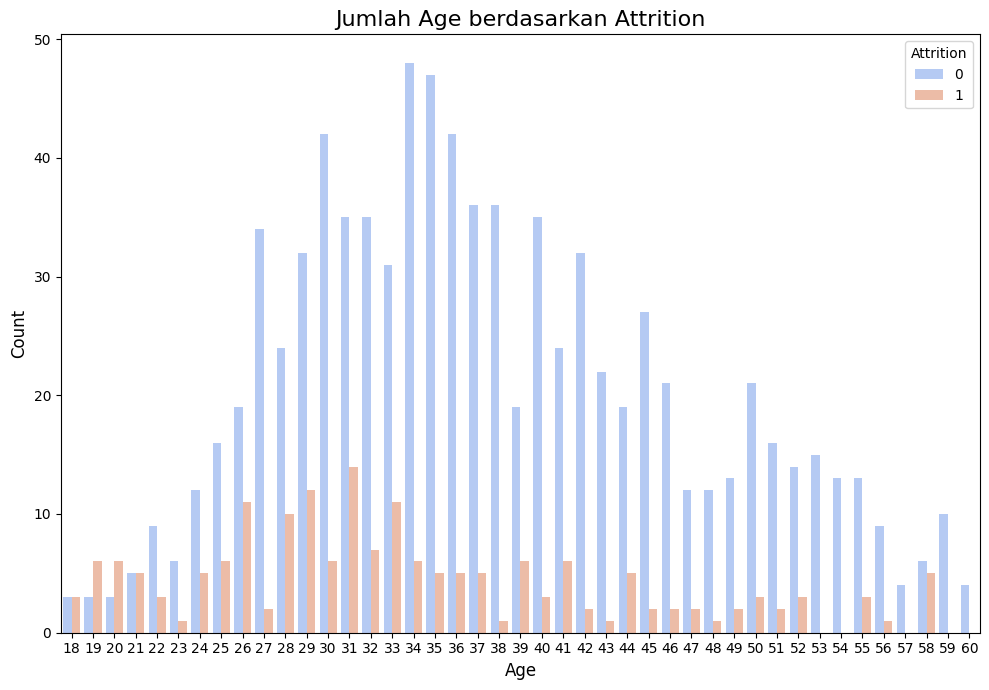

In [ ]:
# Menggambarkan perbandingan fitur Age & Attrition

plot_count(
        feature="Age",
        df=df,
        segment_feature="Attrition"
)

Berdasarkan analisis usia karyawan, terlihat bahwa karyawan berusia 19 dan 20 tahun lebih banyak meninggalkan perusahaan dibandingkan dengan yang bertahan. Sebaliknya, mayoritas karyawan berusia di atas 53 tahun cenderung tetap bertahan di perusahaan. Menariknya, usia 31 tahun menjadi usia dengan jumlah karyawan terbanyak yang memutuskan untuk keluar. Meskipun demikian, secara keseluruhan, jumlah karyawan yang bertahan di perusahaan tetap lebih tinggi dibandingkan dengan mereka yang keluar.

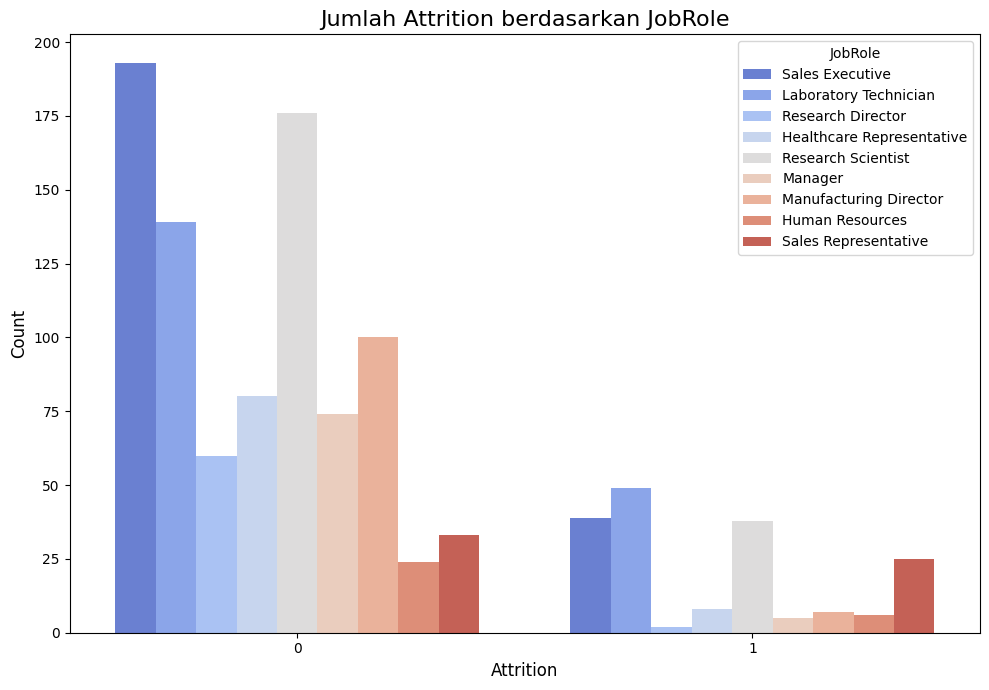

In [ ]:
plot_count(
        feature="Attrition",
        df=df,
        segment_feature="JobRole"
)

Berdasarkan analisis peran pekerjaan, karyawan dengan peran sebagai Laboratory Technician menjadi kelompok dengan jumlah terbanyak yang meninggalkan perusahaan. Sebaliknya, peran Research Director memiliki jumlah karyawan keluar yang paling sedikit. Selain itu, karyawan dengan peran Sales Representative menunjukkan tingkat attrition yang tinggi, menandakan kecenderungan yang lebih besar untuk meninggalkan perusahaan dibandingkan peran lainnya.

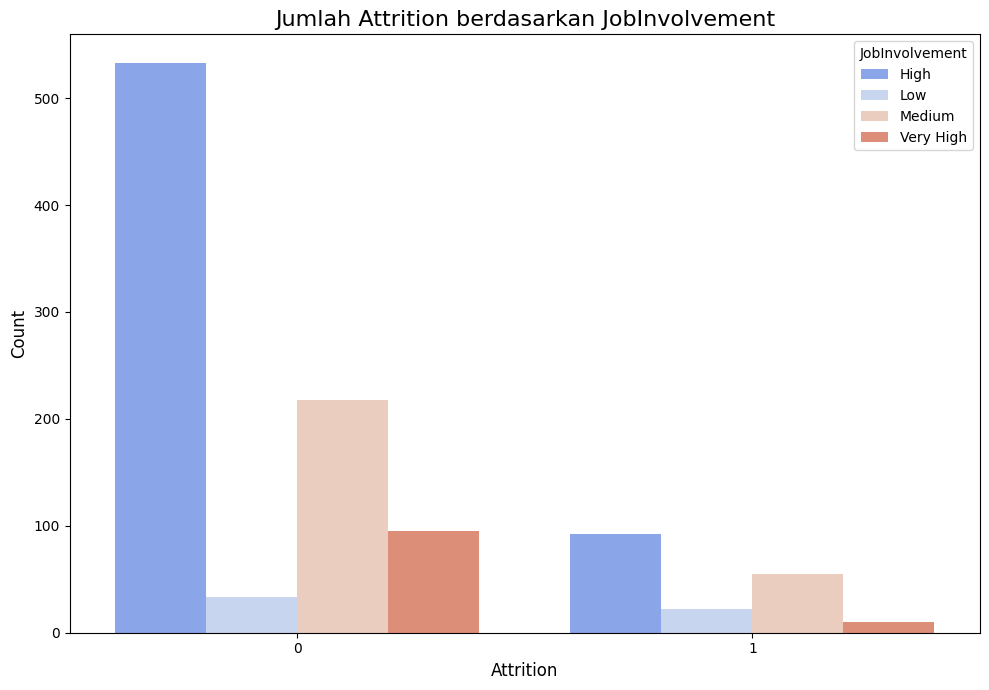

In [ ]:
plot_count(
        feature="Attrition",
        df=df,
        segment_feature="JobInvolvement"
)

Terlihat bahwa karyawan dengan tingkat keterlibatan rendah dalam pekerjaan memiliki kemungkinan lebih besar untuk meninggalkan perusahaan. Hal ini tercermin pada kategori "Low," di mana jumlah karyawan yang keluar hampir mendekati total populasi kategori tersebut.

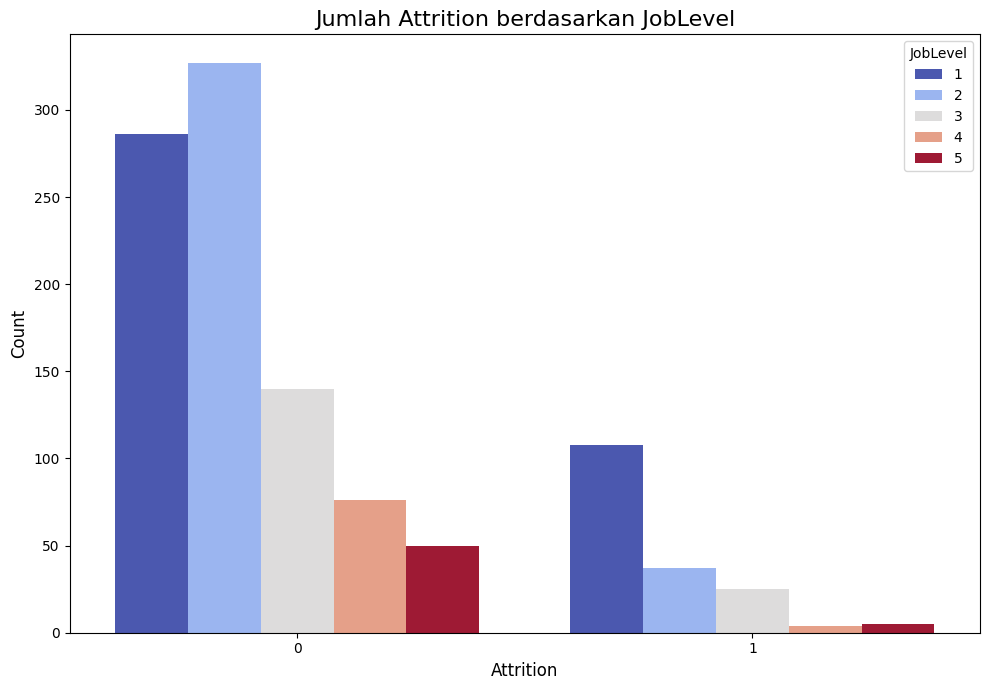

In [ ]:
plot_count(
        feature="Attrition",
        df=df,
        segment_feature="JobLevel"
)

Berdasarkan tingkat level pekerjaan, terlihat bahwa karyawan pada level pekerjaan yang lebih tinggi cenderung memiliki tingkat keluar dari perusahaan yang lebih rendah dibandingkan dengan karyawan pada level pekerjaan yang lebih rendah.

## Data Preparation / Preprocessing

Melakukan pengecekan untuk data yang missing value dan duplikasi

In [ ]:
print(df.duplicated().sum())

0


Tidak ada data yang terduplikasi

In [ ]:
df.isna().sum()

,0
EmployeeId,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EnvironmentSatisfaction,0


Terdapat missing value pada kolom Attrition, maka akan dilakukan pembersihan data kosong dengan bantuan fungsi **`dropna()`**

In [ ]:
df= df.dropna()
df

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,2,37,1,Travel_Rarely,1141,Research & Development,11,College,Medical,Low,...,Low,80,0,15,2,Low,1,0,0,0
1,3,51,1,Travel_Rarely,1323,Research & Development,4,Master,Life Sciences,Low,...,High,80,3,18,2,Outstanding,10,0,2,7
2,4,42,0,Travel_Frequently,555,Sales,26,Bachelor,Marketing,High,...,Very High,80,1,23,2,Outstanding,20,4,4,8
3,7,40,0,Travel_Rarely,1124,Sales,1,College,Medical,Medium,...,High,80,3,6,2,Good,4,3,0,2
4,8,55,1,Travel_Rarely,725,Research & Development,2,Bachelor,Medical,Very High,...,Very High,80,1,24,2,Excellent,5,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053,1465,28,1,Non-Travel,1366,Research & Development,24,College,Technical Degree,Medium,...,Low,80,0,10,2,Good,10,7,1,9
1054,1466,38,0,Travel_Rarely,168,Research & Development,1,Bachelor,Life Sciences,High,...,Very High,80,0,10,4,Outstanding,1,0,0,0
1055,1468,28,1,Travel_Rarely,1485,Research & Development,12,Below College,Life Sciences,High,...,Very High,80,0,1,4,Good,1,1,0,0
1056,1469,40,0,Non-Travel,458,Research & Development,16,College,Life Sciences,High,...,Medium,80,1,6,0,Excellent,4,2,0,0


Cek kembali apakah data yang missing sudah terhapus

In [ ]:
df.isna().sum()

,0
EmployeeId,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EnvironmentSatisfaction,0


Dapat dilihat bahwa sudah tidak ada lagi data yang missing.

Berikutnya adalah proses untuk melakukan pengecekan tipe data setiap kolom apakah sudah sesuai atau belum dengan value nya.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeId                1058 non-null   int64 
 1   Age                       1058 non-null   int64 
 2   Attrition                 1058 non-null   int64 
 3   BusinessTravel            1058 non-null   object
 4   DailyRate                 1058 non-null   int64 
 5   Department                1058 non-null   object
 6   DistanceFromHome          1058 non-null   int64 
 7   Education                 1058 non-null   object
 8   EducationField            1058 non-null   object
 9   EnvironmentSatisfaction   1058 non-null   object
 10  Gender                    1058 non-null   object
 11  HourlyRate                1058 non-null   int64 
 12  JobInvolvement            1058 non-null   object
 13  JobLevel                  1058 non-null   int64 
 14  JobRole                 

Setelah diperiksa ternyata ada satu tipe data yang belum pas, jadi perlu dilakukan perbaikan dengan mengubah data float menjadi integer yaitu Attrition,

In [ ]:
# Membuat salinan independen dari DataFrame
df = df.copy()
df["Attrition"] = df["Attrition"].astype(int)

Berikutnya melakukan konversi data numerik pada beberapa fitur menjadi data kategori dengan label deskriptif agar lebih mudah dipahami. Misalnya, fitur "**Education**" yang awalnya memiliki nilai 1-5 dikonversi menjadi kategori seperti "**Below College**", "**College**", hingga "**Doctor**". Fitur lainnya seperti "**WorkLifeBalance**". Proses ini dilakukan menggunakan fungsi **`apply()`** untuk menerapkan logika konversi pada setiap nilai dalam kolom yang ditentukan. Hal ini berguna untuk meningkatkan interpretabilitas data, terutama saat analisis atau visualisasi.

In [ ]:
# Fungsi untuk mengonversi fitur ke kategori deskriptif
def konversi_fitur(fitur):
    kategori = {
        "Education": {1: "Below College", 2: "College", 3: "Bachelor", 4: "Master", 5: "Doctor"},
        "WorkLifeBalance": {1: "Low", 2: "Good", 3: "Excellent", 4: "Outstanding"},
        "Default": {1: "Low", 2: "Medium", 3: "High", 4: "Very High"},
        "BusinessTravel": {1: "Travel_Frequently", 2: "Travel_Rarely", 3: "Non-Travel"}
    }

    if isinstance(fitur, list):  # Jika fitur adalah list
        for my_fitur in fitur:
            df[my_fitur] = df[my_fitur].replace(kategori["Default"])
    elif fitur in kategori:  # Jika fitur adalah string
        df[fitur] = df[fitur].replace(kategori[fitur])
    return df

# Menjalankan fungsi untuk konversi
fitur_konversi_1 = "Education"
df = konversi_fitur(fitur_konversi_1)

fitur_konversi_2 = ["EnvironmentSatisfaction", "JobInvolvement", "JobSatisfaction", "PerformanceRating", "RelationshipSatisfaction"]
df = konversi_fitur(fitur_konversi_2)

fitur_konversi_3 = "WorkLifeBalance"
df = konversi_fitur(fitur_konversi_3)

fitur_konversi_4 = "BusinessTravel"
df = konversi_fitur(fitur_konversi_4)

Setelah memperbaiki data, berikut dilakukan beberapa visualisasi data dan gambaran tentang hubungan beberapa variabel dengan variabel lain dalam bentuk grafik maupun dalam bentuk tabel.

Buat proses untuk melihat statisitik data yang bertipe kategorikal dan data numerik dengan fungsi **`.describe()`**

In [ ]:
# Statatistik Deskriptif untuk fitur Kategorikal
df.describe(include="object")

,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,OverTime,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
count,1058,1058,1058,1058,1058,1058,1058,1058,1058,1058,1058,1058,1058,1058
unique,3,3,5,6,4,2,4,9,4,3,2,2,4,4
top,Travel_Rarely,Research & Development,Bachelor,Life Sciences,High,Male,High,Sales Executive,Very High,Married,No,High,High,Excellent
freq,746,701,410,436,335,620,625,232,340,464,751,899,324,638


In [ ]:
# Statatistik Deskriptif untuk fitur numerik
df.describe()

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.0,1058.000000,1058.000000,1058.000000,1058.000000,1058.00000,1058.000000,1058.000000
mean,736.656900,37.055766,0.169187,809.542533,8.978261,65.643667,2.090737,6625.945180,14267.281664,2.706994,15.155955,80.0,0.762760,11.435728,2.769376,7.065217,4.26087,2.203214,4.142722
std,427.440538,9.410421,0.375094,408.478049,8.040608,20.324861,1.136514,4837.695042,7048.077305,2.523526,3.641097,0.0,0.837537,8.016429,1.302689,6.265227,3.61747,3.266948,3.599044
min,2.000000,18.000000,0.000000,102.000000,1.000000,30.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,80.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,364.250000,30.000000,0.000000,465.250000,2.000000,48.000000,1.000000,2900.250000,8277.250000,1.000000,12.000000,80.0,0.000000,6.000000,2.000000,3.000000,2.00000,0.000000,2.000000
50%,731.500000,36.000000,0.000000,817.500000,7.000000,65.000000,2.000000,4903.500000,14201.000000,2.000000,14.000000,80.0,1.000000,10.000000,3.000000,5.000000,3.00000,1.000000,3.000000
75%,1117.750000,43.000000,0.000000,1168.500000,13.000000,83.000000,3.000000,8736.500000,20364.000000,4.000000,18.000000,80.0,1.000000,16.000000,3.000000,9.000000,7.00000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,100.000000,5.000000,19999.000000,26999.000000,9.000000,25.000000,80.0,3.000000,40.000000,6.000000,40.000000,18.00000,15.000000,17.000000


Berikutnya akan mempersiapkan dataset agar dapat digunakan dalam algoritma machine learning. Pertama, fitur-fitur dalam dataset dipisahkan berdasarkan tipe data: fitur bertipe kategorikal ditambahkan ke dalam daftar fitur_encoding, sementara fitur numerik dimasukkan ke dalam daftar fitur_normalisasi. Selanjutnya, fitur kategorikal diubah menjadi representasi numerik menggunakan Label Encoder. Proses ini memastikan bahwa data kategorikal dapat dipahami oleh model machine learning, karena sebagian besar model hanya bekerja dengan data numerik. Selain itu, salinan dataset dibuat sebelum transformasi untuk menjaga integritas dataset asli, sehingga perubahan yang dilakukan tidak memengaruhi data mentah. Akhirnya, dataset hasil encoding siap untuk digunakan dalam pelatihan model.

In [ ]:
# Inisialisasi fitur yang tidak akan di encoding

fitur_normalisasi, fitur_encoding = [], []

for fitur in df:
  if df[fitur].dtype == "object":
      fitur_encoding.append(fitur)
  else:
      fitur_normalisasi.append(fitur)

# Mendapatkan fitur yang akan di encoding
print("Fitur yang di encode")
print(fitur_encoding)

# Melakukan Label Encoder pada fitur
LE = LabelEncoder() #Mendefenisikan LabelEncoder sebagai LE
df = df.copy() #Mencegah SettingWithCopyWarning pandas
df[fitur_encoding] = df[fitur_encoding].apply(LE.fit_transform) #Menerapkan LabelEncoder untuk fitur terpilih

Fitur yang di encode
['BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance']


In [ ]:
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,2,37,1,2,1141,1,11,2,3,1,...,1,80,0,15,2,2,1,0,0,0
1,3,51,1,2,1323,1,4,4,1,1,...,0,80,3,18,2,3,10,0,2,7
2,4,42,0,1,555,2,26,0,2,0,...,3,80,1,23,2,3,20,4,4,8
3,7,40,0,2,1124,2,1,2,3,2,...,0,80,3,6,2,1,4,3,0,2
4,8,55,1,2,725,1,2,0,3,3,...,3,80,1,24,2,0,5,2,1,4


Selanjutnya melakukan normalisasi pada fitur numerik dalam dataset, sehingga nilai-nilai dari fitur tersebut berada dalam rentang 0 hingga 1. Langkah ini dilakukan menggunakan **MinMaxScaler**, yang mengubah setiap nilai dalam fitur numerik berdasarkan skala minimum dan maksimum dari masing-masing fitur. Proses ini membantu menyamakan skala fitur-fitur yang memiliki rentang nilai yang berbeda, sehingga algoritma machine learning, terutama yang sensitif terhadap skala (seperti gradient descent), dapat bekerja lebih optimal.

In [ ]:
# Melakukan normalisasi untuk beberapa fitur

scaler = MinMaxScaler()  # Inisialisasi MinMaxScaler
normalized_features = scaler.fit_transform(df[fitur_normalisasi])  # Normalisasi fitur numerik
df[fitur_normalisasi] = pd.DataFrame(normalized_features, columns=fitur_normalisasi)  # Simpan hasil normalisasi ke DataFrame

# Menampilkan nilai minimum dan maksimum setelah normalisasi
print("Fitur yang telah dinormalisasi:")
summary = df[fitur_normalisasi].describe().loc[['min', 'max']].T
print(summary)

Fitur yang telah dinormalisasi:
                         min  max
EmployeeId               0.0  1.0
Age                      0.0  1.0
Attrition                0.0  1.0
DailyRate                0.0  1.0
DistanceFromHome         0.0  1.0
HourlyRate               0.0  1.0
JobLevel                 0.0  1.0
MonthlyIncome            0.0  1.0
MonthlyRate              0.0  1.0
NumCompaniesWorked       0.0  1.0
PercentSalaryHike        0.0  1.0
StandardHours            0.0  0.0
StockOptionLevel         0.0  1.0
TotalWorkingYears        0.0  1.0
TrainingTimesLastYear    0.0  1.0
YearsAtCompany           0.0  1.0
YearsInCurrentRole       0.0  1.0
YearsSinceLastPromotion  0.0  1.0
YearsWithCurrManager     0.0  1.0


In [ ]:
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.000000,0.452381,1.0,2,0.743737,1,0.357143,2,3,1,...,1,0.0,0.000000,0.375,0.333333,2,0.025,0.000000,0.000000,0.000000
1,0.000681,0.785714,1.0,2,0.874016,1,0.107143,4,1,1,...,0,0.0,1.000000,0.450,0.333333,3,0.250,0.000000,0.133333,0.411765
2,0.001362,0.571429,0.0,1,0.324266,2,0.892857,0,2,0,...,3,0.0,0.333333,0.575,0.333333,3,0.500,0.222222,0.266667,0.470588
3,0.003406,0.523810,0.0,2,0.731568,2,0.000000,2,3,2,...,0,0.0,1.000000,0.150,0.333333,1,0.100,0.166667,0.000000,0.117647
4,0.004087,0.880952,1.0,2,0.445956,1,0.035714,0,3,3,...,3,0.0,0.333333,0.600,0.333333,0,0.125,0.111111,0.066667,0.235294


In [ ]:
# Membagi dataset

X = df.drop(["Attrition"], axis = 1) #Variabel X adalah fitur2 yang tergolong dalam class
y = df["Attrition"] #Variabel Y adalah fitur yang tergolong sebagai label / target

# Membagi dataset ke dalam train dan test dengan proporsi test sebanyak 30% dari populasi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Cek dataset
print("Shape of X_train :", X_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of X_test :", X_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of X_train : (740, 32)
Shape of y_train : (740,)
Shape of X_test : (318, 32)
Shape of y_test : (318,)


## Modeling

In [ ]:
# Insialisasi model
models = {}

# Logistic Regression
models['Logistic Regression'] = LogisticRegression(class_weight='balanced')

# Support Vector Machines
models['Support Vector Machines'] = LinearSVC(class_weight='balanced', max_iter=12000)

# Decision Trees
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
models['K-Nearest Neighbor'] = KNeighborsClassifier()


accuracy, precision, recall, f1 = {}, {}, {}, {}

for key in models.keys():

    # Melakukan train setiap model
    models[key].fit(X_train, y_train)

    # Melakukan prediksi model
    predictions = models[key].predict(X_test)

    # Menghitung metrik Accuracy, Precision and Recall
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)
    f1[key] = f1_score(predictions, y_test)

In [ ]:
# Menampilkan evaluasi setiap model

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()
df_model['F1-Score'] = f1.values()

df_model

,Accuracy,Precision,Recall,F1-Score
Logistic Regression,0.698113,0.627451,0.293578,0.400000
Support Vector Machines,0.694969,0.627451,0.290909,0.397516
Decision Trees,0.786164,0.490196,0.373134,0.423729
Random Forest,0.845912,0.156863,0.571429,0.246154
Naive Bayes,0.672956,0.470588,0.237624,0.315789
K-Nearest Neighbor,0.817610,0.078431,0.266667,0.121212


Berdasarkan hasil evaluasi model, terlihat bahwa Random Forest memiliki akurasi tertinggi sebesar 83.96%, menunjukkan kemampuannya yang baik dalam memprediksi data secara keseluruhan. Namun, model ini memiliki precision yang sangat rendah (11.76%) meskipun recall tinggi (50%), mengindikasikan bahwa banyak prediksi positif yang salah. Logistic Regression dan Support Vector Machines menunjukkan performa yang serupa dengan akurasi sekitar 69.8% dan F1-Score sekitar 40%, memberikan keseimbangan yang moderat antara precision dan recall. Decision Trees menunjukkan akurasi yang cukup tinggi (77.04%) tetapi F1-Score rendah (33.03%), yang berarti prediksinya kurang stabil. Naive Bayes menunjukkan akurasi paling rendah (67.30%) dengan precision dan recall yang juga rendah, sedangkan K-Nearest Neighbor memiliki akurasi tinggi (81.76%) namun performa buruk pada precision (7.84%) dan F1-Score (12.12%), menandakan ketidakseimbangan dalam memprediksi kelas. Kesimpulannya, tidak ada model yang sempurna; pemilihan model terbaik akan tergantung pada konteks dan prioritas antara akurasi, precision, recall, dan F1-Score.

## Evaluation

In [ ]:
# Memanggil model Random Forest
model_RandomForestClassifier = RandomForestClassifier()

In [ ]:
# Melakukan training model
model_rdf = model_RandomForestClassifier.fit(X_train,y_train)
#print(rdf_model)

# Melakukan prediksi dengan training model
y_train_pred_rdf = model_rdf.predict(X_train)
print(y_train_pred_rdf.shape)

(740,)


In [ ]:
# Melakukan prediksi dengan testing model
y_test_pred_rdf = model_rdf.predict(X_test)
print(y_test_pred_rdf.shape)

(318,)


In [ ]:
y_test_pred_rdf

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
# classification report - training model
print('Classification Report Training Model (Random Forest Classifier) :')
print(classification_report(y_train,y_train_pred_rdf))

Classification Report Training Model (Random Forest Classifier) :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       612
         1.0       1.00      1.00      1.00       128

    accuracy                           1.00       740
   macro avg       1.00      1.00      1.00       740
weighted avg       1.00      1.00      1.00       740



Selanjutnya adalah membangun dan memvisualisasikan Confusion Matrix dari model Random Forest berdasarkan data pelatihan. Data matrix didefinisikan sebagai DataFrame agar label "Actual" dan "Predicted" lebih jelas ditampilkan di sumbu baris dan kolom.

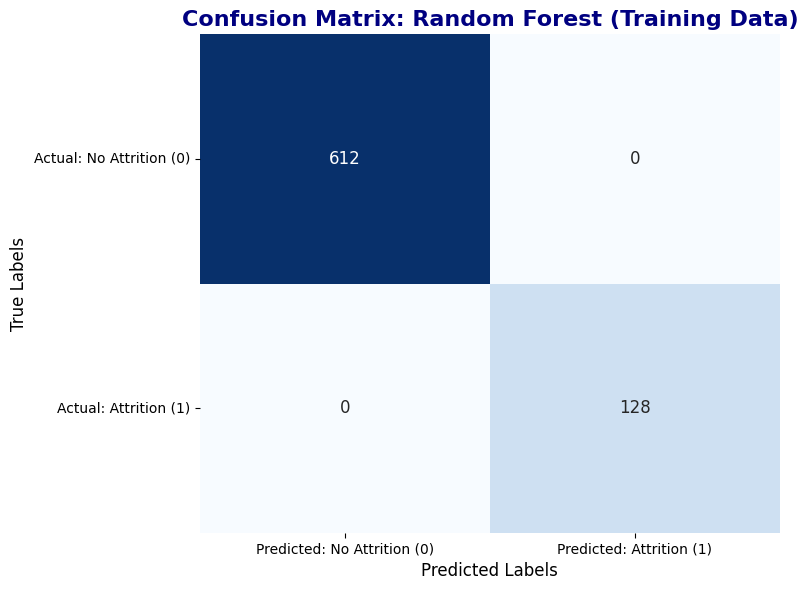

In [ ]:
# Membuat confusion matrix sebagai DataFrame
conf_matrix = confusion_matrix(y_train, y_train_pred_rdf)
confusion_matrix_df = pd.DataFrame(conf_matrix, index=['Actual: No Attrition (0)', 'Actual: Attrition (1)'],
                                   columns=['Predicted: No Attrition (0)', 'Predicted: Attrition (1)'])

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_df, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'fontsize': 12})
plt.title('Confusion Matrix: Random Forest (Training Data)', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10, rotation=0)
plt.tight_layout()
plt.show()

Confusion matrix dari model Random Forest pada data pelatihan menunjukkan bahwa model berhasil melakukan prediksi dengan sempurna, tanpa adanya kesalahan. Sebanyak 612 karyawan yang sebenarnya tidak keluar dari perusahaan berhasil diprediksi dengan benar sebagai tidak keluar (True Negative), dan 128 karyawan yang keluar dari perusahaan juga diprediksi dengan benar sebagai keluar (True Positive). Tidak terdapat kesalahan prediksi, baik karyawan yang tidak keluar diprediksi keluar (False Positive) maupun karyawan yang keluar diprediksi tidak keluar (False Negative).

In [ ]:
# classification report - testing model
print('Classification Report Testing Model (Random Forest Classifier) :')
print(classification_report(y_test,y_test_pred_rdf))

Classification Report Testing Model (Random Forest Classifier) :
              precision    recall  f1-score   support

         0.0       0.85      0.97      0.91       267
         1.0       0.47      0.14      0.21        51

    accuracy                           0.84       318
   macro avg       0.66      0.55      0.56       318
weighted avg       0.79      0.84      0.80       318



Berdasarkan classification report untuk model Random Forest pada data uji, terlihat bahwa model memiliki performa yang cukup baik dalam memprediksi kelas mayoritas (karyawan yang tidak keluar dari perusahaan, label 0), dengan precision sebesar 0.85 dan recall sebesar 0.98, menghasilkan f1-score yang tinggi yaitu 0.91. Namun, performa model pada kelas minoritas (karyawan yang keluar dari perusahaan, label 1) cukup rendah. Precision untuk kelas ini hanya sebesar 0.55, dengan recall yang sangat rendah, yaitu 0.12, menghasilkan f1-score sebesar 0.19.

Secara keseluruhan, akurasi model mencapai 0.84, yang menunjukkan bahwa model cukup baik dalam mengklasifikasikan data uji secara keseluruhan. Namun, rata-rata makro (macro avg) menunjukkan bahwa model kurang seimbang dalam menangani kedua kelas, dengan f1-score rata-rata sebesar 0.55. Hal ini menunjukkan bahwa model lebih fokus pada prediksi kelas mayoritas (karyawan yang tidak keluar) dibandingkan kelas minoritas (karyawan yang keluar). Untuk mengatasi ketidakseimbangan ini, diperlukan strategi seperti oversampling kelas minoritas atau penggunaan metrik evaluasi yang lebih berfokus pada kelas minoritas, agar performa model pada kedua kelas menjadi lebih seimbang.

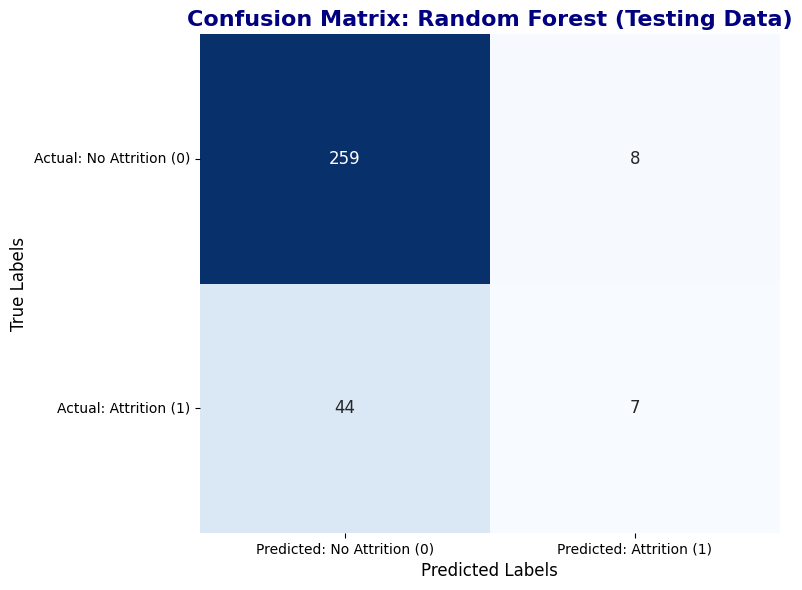

In [ ]:
# Membuat confusion matrix sebagai DataFrame
conf_matrix = confusion_matrix(y_test, y_test_pred_rdf)
confusion_matrix_df = pd.DataFrame(conf_matrix, index=['Actual: No Attrition (0)', 'Actual: Attrition (1)'],
                                   columns=['Predicted: No Attrition (0)', 'Predicted: Attrition (1)'])

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_df, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'fontsize': 12})
plt.title('Confusion Matrix: Random Forest (Testing Data)', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10, rotation=0)
plt.tight_layout()
plt.show()

Confusion matrix dari model Random Forest pada data pelatihan menunjukkan bahwa model berhasil melakukan prediksi dengan baik pada data karyawan yang tidak keluar dengan ada sedikit kesalahan, yaitu sebanyak 612 karyawan yang tidak keluar dari perusahaan berhasil diprediksi dengan benar sebagai tidak keluar (True Negative), namun 45 karyawan yang keluar dari perusahaan diprediksi dengan salah sebagai tidak keluar (True Positive), dan hanya dengan 6 data yang benar diprediksi.

In [ ]:
#List Hyperparameters yang akan diuji
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

clf = GridSearchCV(estimator = model_rdf, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)

#Fitting Model
best_model = clf.fit(X_train,y_train)

#Nilai hyperparameters terbaik
print('Best parameter        :', best_model.best_estimator_)

#Prediksi menggunakan model baru
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

#Check performa dari model
# classification report - training model
print('\nClassification Report Training Model (Random Forest Classifier) :')
print(classification_report(y_train,y_train_pred))

# classification report - testing model
print('\nClassification Report Testing Model (Random Forest Classifier) :')
print(classification_report(y_test,y_test_pred))

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameter        : RandomForestClassifier(max_depth=90, max_features=3, min_samples_leaf=4,
                       min_samples_split=8, n_estimators=200)

Classification Report Training Model (Random Forest Classifier) :
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94       612
         1.0       0.98      0.40      0.57       128

    accuracy                           0.89       740
   macro avg       0.93      0.70      0.75       740
weighted avg       0.90      0.89      0.88       740


Classification Report Testing Model (Random Forest Classifier) :
              precision    recall  f1-score   support

         0.0       0.85      0.99      0.91       267
         1.0       0.60      0.06      0.11        51

    accuracy                           0.84       318
   macro avg       0.72      0.53      0.51       318
weighted avg       0.81      0.84      0.78       318



In [ ]:
# Melakukan export model
joblib.dump(best_model, "random_forest.joblib")

['random_forest.joblib']

In [ ]:
! pip freeze requirements.txt

absl-py==1.4.0
accelerate==1.1.1
aiohappyeyeballs==2.4.3
aiohttp==3.11.2
aiosignal==1.3.1
alabaster==1.0.0
albucore==0.0.19
albumentations==1.4.20
altair==4.2.2
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.5.1
arviz==0.20.0
astropy==6.1.6
astropy-iers-data==0.2024.11.18.0.35.2
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.1.0
attrs==24.2.0
audioread==3.0.1
autograd==1.7.0
babel==2.16.0
backcall==0.2.0
beautifulsoup4==4.12.3
bigframes==1.27.0
bigquery-magics==0.4.0
bleach==6.2.0
blinker==1.9.0
blis==0.7.11
blosc2==2.7.1
bokeh==3.6.1
Bottleneck==1.4.2
bqplot==0.12.43
branca==0.8.0
CacheControl==0.14.1
cachetools==5.5.0
catalogue==2.0.10
certifi==2024.8.30
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.0
chex==0.1.87
clarabel==0.9.0
click==8.1.7
cloudpathlib==0.20.0
cloudpickle==3.1.0
cmake==3.30.5
cmdstanpy==1.2.4
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.5
cons==0.4.6
contourpy==1.

In [18]:
import joblib

model = joblib.load('/content/random_forest.joblib')

In [13]:
# Membaca data prediksi dari file CSV
data = pd.read_csv('/content/predict.csv')  # Gantilah dengan nama file CSV Anda
data.head()

,EmployeeId,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,2,40,Travel_Rarely,1141,Research & Development,11,College,Medical,Low,Female,...,Low,80,0,15,2,Low,1,0,0,0
1,7,54,Travel_Rarely,1124,Sales,1,College,Medical,Medium,Male,...,High,80,3,6,2,Good,4,3,0,2
2,8,38,Travel_Rarely,725,Research & Development,2,Bachelor,Medical,Very High,Female,...,Very High,80,1,24,2,Excellent,5,2,1,4
3,12,20,Travel_Rarely,129,Research & Development,4,Bachelor,Technical Degree,Low,Male,...,Medium,80,0,1,2,Excellent,1,0,0,0
4,290,37,Travel_Rarely,807,Human Resources,6,Master,Human Resources,High,Male,...,Very High,80,0,7,3,Excellent,3,2,0,2


In [17]:
# Kolom kategorikal yang perlu di-encode
categorical_columns = ['BusinessTravel', 'Department', 'Education', 'EducationField',
                       'EnvironmentSatisfaction', 'Gender', 'JobRole', 'JobSatisfaction',
                       'MaritalStatus', 'OverTime', 'RelationshipSatisfaction',
                       'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating']

# Inisialisasi LabelEncoder untuk setiap kolom kategorikal
label_encoder = LabelEncoder()

# Melakukan encoding pada kolom kategorikal
for col in categorical_columns:
    if col in data.columns:  # Hanya encode kolom yang ada dalam data
        data[col] = label_encoder.fit_transform(data[col])

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Pilih kolom numerik yang perlu diskalakan
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Terapkan MinMaxScaler hanya pada kolom numerik
data_scaled = data.copy()  # Salin data asli agar data aslinya tetap ada
data_scaled[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Menghapus kolom yang tidak digunakan saat pelatihan (jika ada)
if 'Attrition_Prediction' in data_scaled.columns:
    data_scaled = data_scaled.drop(columns=['Attrition_Prediction'])

# Melakukan prediksi dengan model yang sudah dimuat
predictions = model.predict(data_scaled)

# Menambahkan kolom prediksi ke data asli
data['Attrition_Prediction'] = ['Yes' if pred == 1 else 'No' for pred in predictions]

# Menampilkan hanya kolom EmployeeId dan Attrition_Prediction
result = data[['EmployeeId', 'Attrition_Prediction']]

# Menampilkan hasil dalam bentuk tabel
print("Hasil Prediksi (Tabel):")
from tabulate import tabulate
print(tabulate(result, headers='keys', tablefmt='fancy_grid'))

Hasil Prediksi (Tabel):
╒════╤══════════════╤════════════════════════╕
│    │   EmployeeId │ Attrition_Prediction   │
╞════╪══════════════╪════════════════════════╡
│  0 │            2 │ No                     │
├────┼──────────────┼────────────────────────┤
│  1 │            7 │ No                     │
├────┼──────────────┼────────────────────────┤
│  2 │            8 │ No                     │
├────┼──────────────┼────────────────────────┤
│  3 │           12 │ No                     │
├────┼──────────────┼────────────────────────┤
│  4 │          290 │ No                     │
├────┼──────────────┼────────────────────────┤
│  5 │          409 │ Yes                    │
╘════╧══════════════╧════════════════════════╛
